In [2]:
# 폰트 등록하기 
import matplotlib.pyplot as plt
from matplotlib import font_manager 

## 폰트 경로
font_path = "C:\Windows\Fonts\TmoneyRoundWindExtraBold.ttf"
## 폰트 추가
font_manager.fontManager.addfont(font_path)
## 폰트 이름 확인
font_name = font_manager.FontProperties(fname=font_path).get_name()
print(font_name)

<>:6: SyntaxWarning: invalid escape sequence '\W'
<>:6: SyntaxWarning: invalid escape sequence '\W'
C:\Users\user\AppData\Local\Temp\ipykernel_14124\4258769705.py:6: SyntaxWarning: invalid escape sequence '\W'
  font_path = "C:\Windows\Fonts\TmoneyRoundWindExtraBold.ttf"


Tmoney RoundWind


In [3]:
# 내가 가지고 있는 폰트 목록 확인하기
from matplotlib import font_manager

search_font = "Tmoney RoundWind"    # 필터

for font in font_manager.findSystemFonts():
  font_info = font_manager.FontProperties(fname=font)
  font_name = font_info.get_name()
  font_path = font_info.get_file()
  if search_font in font_name.lower():
    print(font_name, font_path)

In [4]:
# 폰트 설정하기
font_name = "Tmoney RoundWind"

## 방법1
# plt.rc('font', family=font_name)
## 방법2
plt.rcParams["font.family"] = font_name

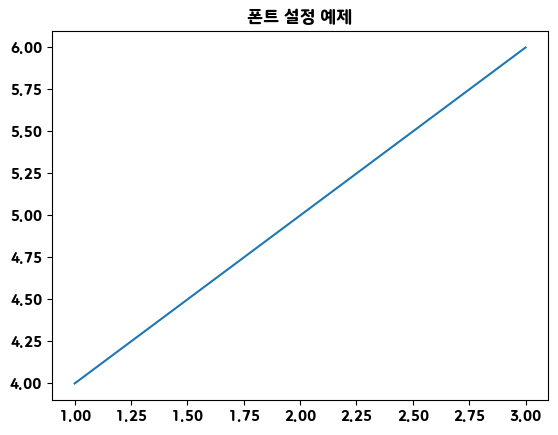

In [5]:
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = font_name

# 간단한 예제
plt.figure()
plt.plot([1, 2, 3], [4, 5, 6])
plt.title('폰트 설정 예제')
plt.show()


In [31]:
# 구글 플레이스토어 리뷰 크롤링

from google_play_scraper import Sort, reviews_all

# 크롤링 대상 앱 정보
app_name = "com.titicacacorp.triple"
app_operation = reviews_all(
    app_name,
    sleep_milliseconds=0, # defaults to 20
    lang = "ko",
    country="kr", # defaults to 'us'
    sort=Sort.NEWEST, # defaults to Sort.MOST_RELEVANT
)

reviews_list = []

# 리뷰 데이터 수집
for review in app_operation:
    review_dict = {
        'review_id': review['reviewId'],
        'text': review['content'],
        'score': review['score'],
        'thumbs_up_count': review['thumbsUpCount']
    }
    reviews_list.append(review_dict)

# pandas DataFrame으로 변환
import pandas as pd  
reviews = pd.DataFrame(reviews_list)
reviews

,review_id,text,score,thumbs_up_count
0,55c336af-42a3-4dbd-8ffa-910f950ef354,여행 정리하기 편해서 좋아요,5,0
1,d1732f3b-9727-4e89-b1c8-6ffd6497da46,요즘 일본 여행 많이 가는데 대마도 정보도 좀 업데이트해 주세요.. 대마도 추가를 ...,3,0
2,8bd08b02-561c-4108-9761-f76fa42f258e,여행 필수앱. 다른 사람 여행기를 북마크나 즐겨찾기 등으로 저장하는 기능이 있으면 ...,5,0
3,6c71985a-d9b9-4446-9bae-b098034c1ea0,7년째 사용하고 있는 여행어플! 루트짜기 최적화~ 지도보면서 동선 만들기 아주 편해요,5,0
4,e23974f1-558d-487a-aedd-62ca5068a993,여행준비하면서 정말 많이 도움이됐어요 체계적으로 계획을짤수있고 어플사용도 간단하고 ...,5,0
...,...,...,...,...
8056,e90c54b3-f943-4201-becf-16335e83eff4,"☆☆☆대박☆☆☆결혼앞두고 신혼여행지 알아보느라고 정말고생했는데, 진작 알았으면 정말...",5,4
8057,b18211a7-86ea-4d21-ba28-edf5c7218856,기다리고 기더리던 앱,5,2
8058,e95f9c2e-d992-432f-a301-07a1f4ffd00f,완전 깨알 알짜 정보 가득이네요...딴거 볼 필요가 없음..현지가도 이거만 있음 될...,5,4
8059,8a6d506a-6d5e-40a1-9c81-a27b0aba8ba2,넘 좋네요,5,4


In [32]:
reviews.to_csv('reviews.csv', index = False)

In [1]:
import pandas as pd
reviews = pd.read_csv('reviews.csv')

In [2]:
# 이모지 제거
reviews['text'] = reviews['text'].apply(lambda x: x.encode('cp949', 'ignore').decode('cp949'))
reviews['text']

0                                         여행 정리하기 편해서 좋아요
1       요즘 일본 여행 많이 가는데 대마도 정보도 좀 업데이트해 주세요.. 대마도 추가를 ...
2       여행 필수앱. 다른 사람 여행기를 북마크나 즐겨찾기 등으로 저장하는 기능이 있으면 ...
3         7년째 사용하고 있는 여행어플! 루트짜기 최적화~ 지도보면서 동선 만들기 아주 편해요
4       여행준비하면서 정말 많이 도움이됐어요 체계적으로 계획을짤수있고 어플사용도 간단하고 ...
                              ...                        
8056    ☆☆☆대박☆☆☆결혼앞두고 신혼여행지 알아보느라고 정말고생했는데, 진작 알았으면 정말...
8057                                          기다리고 기더리던 앱
8058    완전 깨알 알짜 정보 가득이네요...딴거 볼 필요가 없음..현지가도 이거만 있음 될...
8059                                                넘 좋네요
8060                                      이렇게 편하고 좋을수가!!!
Name: text, Length: 8061, dtype: object

In [3]:
# 1~3점 : 부정, 4~5점 : 긍정
reviews['reaction'] = reviews['score'].apply(lambda x : '부정' if 1 <= x <= 3  else '긍정')
reviews['reaction'].value_counts()

reaction
긍정    7417
부정     644
Name: count, dtype: int64

In [4]:
reaction = reviews['reaction'].value_counts().sort_values(ascending = True)
reaction

reaction
부정     644
긍정    7417
Name: count, dtype: int64

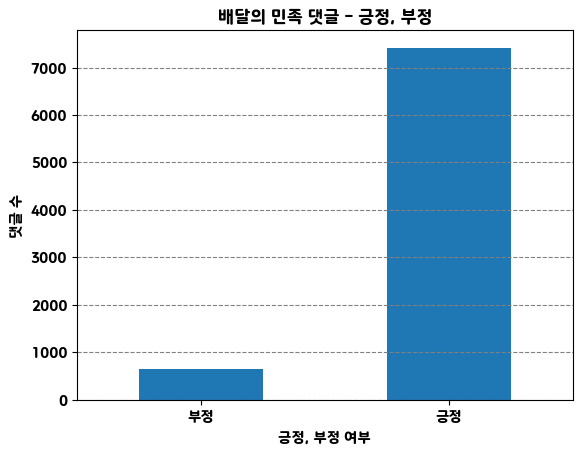

In [10]:
import matplotlib.pyplot as plt

reaction.plot(kind = 'bar')
plt.title("배달의 민족 댓글 - 긍정, 부정")
plt.xlabel("긍정, 부정 여부")
plt.ylabel("댓글 수")
plt.xticks(rotation = 0)
plt.grid(axis = 'y', linestyle = '--', color = 'gray')

In [11]:
# reaction이 긍정, 부정인 경우 나누기
pst = reviews['text'].loc[reviews['reaction'] == '긍정']
neg = reviews['text'].loc[reviews['reaction'] == '부정']

In [12]:
from konlpy.tag import Okt
import re

okt = Okt()   # Okt 불러오기
p_word_list = []
stopwords = ['트리플']

for review in pst :
    new_review = re.sub('[^0-9가-힣\\s+-]', '', review)
    temp = okt.pos(new_review)

    for word, pos in temp :
        if len(word) == 1 or word in stopwords :
            continue
        if pos == 'Noun' :
            p_word_list.append(word)

print(p_word_list)

['여행', '정리', '여행', '필수', '다른', '사람', '여행기', '북마크', '즐겨찾기', '저장', '기능', '여행기', '작성자', '후기', '나중', '확인', '사용', '여행', '어플', '루트', '최적화', '지도', '동선', '만들기', '아주', '여행', '준비', '정말', '도움', '체계', '계획', '어플', '사용', '동선', '한눈', '여행', '여행', '동선', '이제야', '완전', '추천', '여행', '여행', '필수', '어플', '여러가지', '할인', '여행지', '대한', '후기', '정보', '바로', '꼭꼭', '여행', '준비', '편리', '어플', '이용', '여행', '사진', '캡쳐', '일일이', '확인', '한눈', '어플', '여행', '계획', '예약', '여행', '일정', '겨울', '일본여행', '항공', '호텔', '예약', '시간', '절약', '여행', '계획', '어플', '필수', '일정', '항공', '호텔', '여기저기', '검색', '최저', '가로', '예약', '여행', '안성맞춤', '어플', '계획', '예약', '여행', '계획', '여행', '계획', '어플', '여행', '계획', '항공권', '최저', '비교', '알림', '정말', '일정', '려고', '머리아픈데', '하나', '해결', '여행', '일정', '사람', '최고', '어플', '일정', '방문', '진짜', '이번', '겨울', '제주도', '여행', '일정', '계획', '아주', '도움', '일정', '공유', '아주', '여행', '정말', '어플', '요전', '계획', '여행', '필기', '거나', '사진', '캡쳐', '정확', '어플', '한눈', '여행', '일정', '번창', '지역', '검색', '숙소', '최저', '주변', '볼거리', '거리', '한번', '확인', '여행', '계획', '짤때', '도움', '내년', '가족', '해외여행', 

In [13]:
len(p_word_list)

30524

In [14]:
from collections import Counter

counter = Counter(p_word_list)
p_dict = dict(counter.most_common(20))
print(p_dict)

{'여행': 2742, '일정': 1425, '어플': 874, '정보': 826, '계획': 716, '정말': 542, '도움': 537, '최고': 533, '사용': 478, '진짜': 343, '기능': 330, '동선': 321, '공유': 303, '추천': 293, '지도': 290, '정리': 254, '준비': 247, '맛집': 240, '추가': 240, '아주': 223}


In [15]:
from wordcloud import WordCloud
import os

# 워드클라우드 생성
wordcloud = WordCloud(
    font_path = 'C:\Windows\Fonts\TmoneyRoundWindExtraBold.ttf'
).generate_from_frequencies(p_dict)

<>:6: SyntaxWarning: invalid escape sequence '\W'
<>:6: SyntaxWarning: invalid escape sequence '\W'
C:\Users\user\AppData\Local\Temp\ipykernel_10412\667291301.py:6: SyntaxWarning: invalid escape sequence '\W'
  font_path = 'C:\Windows\Fonts\TmoneyRoundWindExtraBold.ttf'


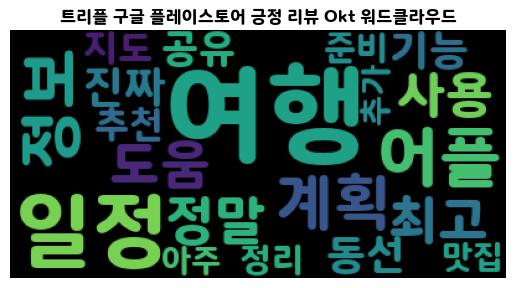

In [16]:
plt.imshow(wordcloud)
plt.title("트리플 구글 플레이스토어 긍정 리뷰 Okt 워드클라우드")
plt.axis("off")

output_dir = "graphs"
output_path = os.path.join(output_dir, "pos_wordcloud.png")
plt.savefig(output_path, dpi=300, facecolor=plt.gcf().get_facecolor())

plt.show()

In [17]:
okt = Okt()   # Okt 불러오기
n_word_list = []
stopwords = ['트리플']

for review in neg :
    new_review = re.sub('[^0-9가-힣\\s+-]', '', review)
    temp = okt.pos(new_review)

    for word, pos in temp :
        if len(word) == 1 or word in stopwords :
            continue
        if pos == 'Noun' :
            n_word_list.append(word)

print(n_word_list)

['요즘', '일본', '여행', '대마도', '정보', '업데이트', '대마도', '추가', '스케줄', '자체', '매우', '론데', '어플', '항공', '경우', '김포', '인천', '안알랴줌', '편도', '보고', '오류', '메모', '식당', '예약', '정보', '캡쳐', '이미지', '장해', '다시', '확인', '처음', '이미지', '이미지', '다른', '사람', '개인정보', '유출', '여행', '카페', '확인', '조취', '취소', '수수료', '절대', '여행', '일정', '잡고', '정보', '확인', '정밀', '항공권', '검색', '기준', '서울', '인천', '클릭', '인천', '기준', '가격', '경우', '지역', '설정', '기능', '몰타', '어학', '때문', '설치', '몰타', '장소', '추가', '검색', '장소', '수기', '장소', '바로', '등록', '방법', '메모', '추가', '메모', '추가', '일정', '비용', '추가', '기능', '사용', '실시간', '변동', '계획', '반영', '추가', '일정', '작성', '시간', '기준', '바로', '시간', '시간', '기준', '다른', '일정', '사이', '시간', '정렬', '자동', '전날', '일정', '계획', '식사', '관광지', '등록', '당일', '변경', '관광지', '추가', '관광지', '추가', '시간', '등록', '일정', '편집', '순서', '관광지', '위로', '과정', '여행', '과정', '손보기', '매우', '기록', '제작자', '보고', '여행', '사용', '거리', '정렬', '직선', '거리', '길이', '도로', '이용', '기준', '건너', '바다', '건너', '가나', '국내', '도로로', '장소', '추가', '웬만큼', '장소', '검색', '주소', '추가', '일단', '장소', '검색', '다시', '한번', '검색', '버튼', '다시'

In [18]:
len(n_word_list)

5505

In [19]:
# counter를 이용하여 가장 많이 언급된 단어 20개를 딕셔너리에 저장
counter = Counter(n_word_list)
n_dict = dict(counter.most_common(20))
print(n_dict)

{'여행': 171, '예약': 121, '일정': 114, '어플': 74, '검색': 73, '도시': 71, '호텔': 68, '장소': 66, '취소': 63, '국내': 61, '추가': 56, '기능': 48, '정보': 46, '등록': 43, '사용': 43, '계획': 43, '연락': 43, '다시': 38, '광고': 36, '문의': 36}


In [20]:
# 워드클라우드 생성
wordcloud = WordCloud(
    font_path = 'C:\Windows\Fonts\TmoneyRoundWindExtraBold.ttf'
).generate_from_frequencies(n_dict)

<>:3: SyntaxWarning: invalid escape sequence '\W'
<>:3: SyntaxWarning: invalid escape sequence '\W'
C:\Users\user\AppData\Local\Temp\ipykernel_10412\3401729439.py:3: SyntaxWarning: invalid escape sequence '\W'
  font_path = 'C:\Windows\Fonts\TmoneyRoundWindExtraBold.ttf'


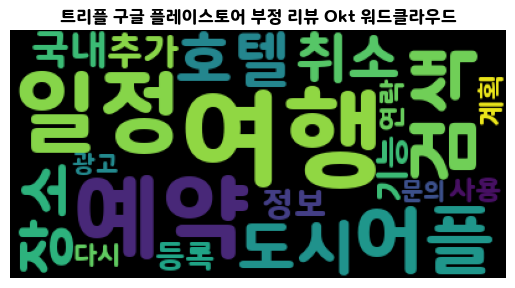

In [21]:
plt.imshow(wordcloud)
plt.title("트리플 구글 플레이스토어 부정 리뷰 Okt 워드클라우드")
plt.axis("off")

output_path = os.path.join(output_dir, "neg_wordcloud.png")
plt.savefig(output_path, dpi=300, facecolor=plt.gcf().get_facecolor())

plt.show()

<>:33: SyntaxWarning: invalid escape sequence '\W'
<>:33: SyntaxWarning: invalid escape sequence '\W'
C:\Users\user\AppData\Local\Temp\ipykernel_10412\341651344.py:33: SyntaxWarning: invalid escape sequence '\W'
  font_path="C:\Windows\Fonts\TmoneyRoundWindExtraBold.ttf",  # 폰트 경로


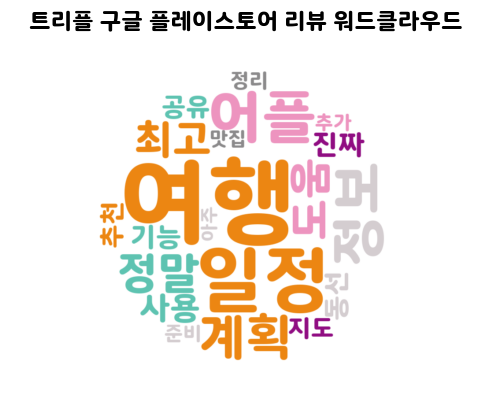

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image

# 마스크 이미지 가져오기
mask_img = np.array(Image.open("circle.png"))

# 특정 색상 정의
highlight_color = (236, 134, 18)  # rgb(236, 134, 18)
other_colors = [
    (144, 13, 130),  # rgb(144, 13, 130)
    (139, 138, 139), # rgb(139, 138, 139)
    (212, 205, 208),  # rgb(212, 205, 208)
    (94, 195, 177),
    (237, 148, 191)
]

# 강조할 단어 리스트
highlight_words = ['여행', '일정', '계획', '최고', '추천']

# 색상 함수 정의
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    if word in highlight_words:
        return f'rgb({highlight_color[0]}, {highlight_color[1]}, {highlight_color[2]})'
    else:
        # 다른 색상 중 하나를 랜덤하게 선택
        other_color = other_colors[np.random.randint(0, len(other_colors))]
        return f'rgb({other_color[0]}, {other_color[1]}, {other_color[2]})'

# 워드클라우드 생성
wordcloud = WordCloud(
    font_path="C:\Windows\Fonts\TmoneyRoundWindExtraBold.ttf",  # 폰트 경로
    mask=mask_img,
    background_color="white",
    color_func=color_func  # 사용자 정의 색상 함수
).generate_from_frequencies(p_dict)

# 워드클라우드 시각화
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("트리플 구글 플레이스토어 리뷰 워드클라우드", fontsize=16)
plt.axis("off")  # 축 숨김
plt.show()

In [51]:
# 리스트 안에 문장별로 단어를 묶어주기 위해 sub_list 이용
okt = Okt()   # Okt 불러오기
p_word_list = []
stopwords = ['트리플']

for review in pst :
    new_review = re.sub('[^0-9가-힣\\s+-]', '', review)
    temp = okt.pos(new_review)
    sub_list = []

    for word, pos in temp :
        if len(word) == 1 or word in stopwords :
            continue
        if pos == 'Noun' :
            sub_list.append(word)
    p_word_list.append(sub_list)
print(p_word_list)

[['여행', '정리'], ['여행', '필수', '다른', '사람', '여행기', '북마크', '즐겨찾기', '저장', '기능', '여행기', '작성자', '후기', '나중', '확인'], ['사용', '여행', '어플', '루트', '최적화', '지도', '동선', '만들기', '아주'], ['여행', '준비', '정말', '도움', '체계', '계획', '어플', '사용'], ['동선', '한눈'], ['여행'], ['여행', '동선', '이제야', '완전', '추천'], ['여행'], [], ['여행', '필수', '어플', '여러가지', '할인', '여행지', '대한', '후기', '정보', '바로', '꼭꼭'], ['여행', '준비', '편리', '어플', '이용', '여행', '사진', '캡쳐', '일일이', '확인', '한눈', '어플', '여행', '계획', '예약', '여행', '일정'], ['겨울', '일본여행', '항공', '호텔', '예약', '시간', '절약'], ['여행', '계획', '어플', '필수', '일정', '항공', '호텔', '여기저기', '검색', '최저', '가로', '예약', '여행', '안성맞춤', '어플'], ['계획', '예약'], ['여행', '계획', '여행', '계획', '어플', '여행', '계획'], ['항공권', '최저', '비교', '알림', '정말', '일정', '려고', '머리아픈데', '하나', '해결'], ['여행', '일정', '사람', '최고', '어플', '일정', '방문', '진짜'], ['이번', '겨울', '제주도', '여행', '일정', '계획', '아주', '도움', '일정', '공유', '아주'], ['여행', '정말', '어플', '요전', '계획', '여행', '필기', '거나', '사진', '캡쳐', '정확', '어플', '한눈'], ['여행', '일정', '번창'], ['지역', '검색', '숙소', '최저', '주변', '볼거리', '거리', '한번', '확인', '

In [52]:
len(p_word_list)

7417

In [53]:
from apyori import apriori

# apriori 이용하여 장바구니 분석 진행(긍정)
result = list(apriori(p_word_list))
p_data = pd.DataFrame(result)

In [54]:
p_data.sort_values(by = 'support', ascending = False)

,items,support,ordered_statistics
1,(여행),0.311582,"[((), (여행), 0.3115815019549683, 1.0)]"
2,(일정),0.166105,"[((), (일정), 0.16610489416206012, 1.0)]"
3,(정보),0.103411,"[((), (정보), 0.10341108264797087, 1.0)]"
0,(어플),0.102467,"[((), (어플), 0.1024673048402319, 1.0)]"


In [55]:
for res in result:
  print(f"WORD:{res.items}")
  print(f"SUPPORT: {res.support}")
  print(f"CONFIDENCE: {res.ordered_statistics[0].confidence}")
  print("="*30)

WORD:frozenset({'어플'})
SUPPORT: 0.1024673048402319
CONFIDENCE: 0.1024673048402319
WORD:frozenset({'여행'})
SUPPORT: 0.3115815019549683
CONFIDENCE: 0.3115815019549683
WORD:frozenset({'일정'})
SUPPORT: 0.16610489416206012
CONFIDENCE: 0.16610489416206012
WORD:frozenset({'정보'})
SUPPORT: 0.10341108264797087
CONFIDENCE: 0.10341108264797087


In [56]:
# 리스트 안에 문장별로 단어를 묶어주기 위해 sub_list 이용
okt = Okt()   # Okt 불러오기
n_word_list = []
stopwords = ['배민', '민족']

for review in neg :
    new_review = re.sub('[^0-9가-힣\\s+-]', '', review)
    temp = okt.pos(new_review)
    sub_list = []

    for word, pos in temp :
        if len(word) == 1 or word in stopwords :
            continue
        if pos == 'Noun' :
            sub_list.append(word)
    n_word_list.append(sub_list)
print(n_word_list)

[['요즘', '일본', '여행', '대마도', '정보', '업데이트', '대마도', '추가', '스케줄', '자체', '매우', '론데'], ['어플'], ['항공', '경우', '김포', '인천', '안알랴줌', '편도', '보고'], ['오류', '메모', '식당', '예약', '정보', '캡쳐', '이미지', '장해', '다시', '확인', '처음', '이미지', '이미지', '다른', '사람', '개인정보', '유출', '여행', '카페', '확인', '조취'], ['취소', '수수료', '절대'], ['여행', '일정', '잡고', '정보', '확인', '정밀', '항공권', '검색', '기준', '서울', '인천', '클릭', '인천', '기준', '가격', '경우', '지역', '설정', '기능'], ['몰타', '어학', '때문', '설치', '몰타'], ['장소', '추가', '검색', '장소', '수기', '장소', '바로', '등록', '방법', '메모', '추가', '메모', '추가', '일정', '비용', '추가', '기능', '사용', '실시간', '변동', '계획', '반영', '추가', '일정', '작성', '시간', '기준', '바로', '시간', '시간', '기준', '다른', '일정', '사이', '시간', '정렬', '자동', '전날', '일정', '계획', '식사', '관광지', '등록', '당일', '변경', '관광지', '추가', '관광지', '추가', '시간', '등록', '일정', '편집', '순서', '관광지', '위로', '과정', '여행', '과정', '손보기', '매우', '기록', '제작자', '보고', '여행', '사용'], ['거리', '정렬', '직선', '거리', '길이', '도로', '이용', '기준', '건너', '바다', '건너', '가나', '국내', '도로로'], ['장소', '추가', '웬만큼', '장소', '검색', '주소', '추가', '일단', '장소', '검색', '다시', '한번

In [57]:
len(n_word_list)

644

In [58]:
# apriori 이용하여 장바구니 분석 진행(부정)
result = list(apriori(n_word_list))
n_data = pd.DataFrame(result)

In [59]:
n_data.sort_values(by = 'support', ascending = False)

,items,support,ordered_statistics
0,(여행),0.208075,"[((), (여행), 0.2080745341614907, 1.0)]"
2,(일정),0.131988,"[((), (일정), 0.13198757763975155, 1.0)]"
1,(예약),0.100932,"[((), (예약), 0.10093167701863354, 1.0)]"


In [60]:
for res in result:
  print(f"WORD:{res.items}")
  print(f"SUPPORT: {res.support}")
  print(f"CONFIDENCE: {res.ordered_statistics[0].confidence}")
  print("="*30)

WORD:frozenset({'여행'})
SUPPORT: 0.2080745341614907
CONFIDENCE: 0.2080745341614907
WORD:frozenset({'예약'})
SUPPORT: 0.10093167701863354
CONFIDENCE: 0.10093167701863354
WORD:frozenset({'일정'})
SUPPORT: 0.13198757763975155
CONFIDENCE: 0.13198757763975155


In [ ]:
# 앱스토어 리뷰 가져오기기
from app_store_scraper import AppStore

def get_appstore_reviews(app_name, country='kr', num_reviews=10000):
    # 앱 정보 설정
    app = AppStore(country=country, app_name=app_name)
    app.review(how_many=num_reviews)  # 댓글 가져오기

    # 댓글 텍스트와 평점만 추출
    extracted_reviews = [
        {'content': review['review'].encode('utf-8').decode('utf-8'), 'score': review['rating']}
        for review in app.reviews
    ]

    return extracted_reviews

# 티머니고 앱의 이름(영어로해야 오류가 안됨)
app_name = 'Triple - Flight·Hotel Lowest Price Booking, Travel Planning'
reviews_data = get_appstore_reviews(app_name, num_reviews=10000)

# 가져온 댓글 출력
for review in reviews_data:
    print(f"평점: {review['score']}, 댓글: {review['content']}")


In [ ]:
len(reviews_data)

In [ ]:
import pandas as pd

reviews_df = pd.DataFrame(reviews_data)

In [ ]:
reviews_df.to_csv('triple_appstore.csv', index = False)

In [33]:
reviews = pd.read_csv('triple_appstore.csv')
reviews.columns = ['text', 'score']
reviews

,text,score
0,여타 예약앱들에 비해 사용이 간편하고 사용자 경험이나 인터페이스가 편하게 되어 있음...,5
1,정말 친절한 대응에 감동받아서 리뷰 안쓰는 사람인데 씁니다 고객센터 답변도 빠른편이...,5
2,7/25일에 예약했는데 급하게 태풍으로 교통이 끊겨서 갈 수 없는 상황이 되어 8/...,2
3,"무료취소 가능한 호텔인 지 확인하고 예약했으며, 충분한 취소기간 내에 취소했습니다....",1
4,해외출장 가는데 2달전 사전결제한 숙소가 입실하는 날 오버부킹이라고 당일 취소되었습...,1
...,...,...
1646,환불도안되고 왕복표 구매하고도 일이있어 타지못하면 돌아오는표는 예약 취소시켜버리고 ...,5
1647,중국은 씨트랩~~^^,5
1648,인터파크나 기타 한국 예약 사이트나 앱 다 비교해봤는데 씨트랩이 가장 저렴함~! \...,5
1649,구입목록삭제부탁드립니다,5


In [34]:
# 이모지 제거
reviews['text'] = reviews['text'].apply(lambda x: x.encode('cp949', 'ignore').decode('cp949'))
reviews['text']

0       여타 예약앱들에 비해 사용이 간편하고 사용자 경험이나 인터페이스가 편하게 되어 있음...
1       정말 친절한 대응에 감동받아서 리뷰 안쓰는 사람인데 씁니다 고객센터 답변도 빠른편이...
2       7/25일에 예약했는데 급하게 태풍으로 교통이 끊겨서 갈 수 없는 상황이 되어 8/...
3       무료취소 가능한 호텔인 지 확인하고 예약했으며, 충분한 취소기간 내에 취소했습니다....
4       해외출장 가는데 2달전 사전결제한 숙소가 입실하는 날 오버부킹이라고 당일 취소되었습...
                              ...                        
1646    환불도안되고 왕복표 구매하고도 일이있어 타지못하면 돌아오는표는 예약 취소시켜버리고 ...
1647                                          중국은 씨트랩~~^^
1648    인터파크나 기타 한국 예약 사이트나 앱 다 비교해봤는데 씨트랩이 가장 저렴함~! \...
1649                                         구입목록삭제부탁드립니다
1650    분명 호텔예약하고 예약번호도 받았는데 호텔은 일년전에 없어진 호텔이고 부킹의 전화번...
Name: text, Length: 1651, dtype: object

In [35]:
# 1~3점 : 부정, 4~5점 : 긍정
reviews['reaction'] = reviews['score'].apply(lambda x : '부정' if 1 <= x <= 3  else '긍정')
reviews['reaction'].value_counts()

reaction
긍정    892
부정    759
Name: count, dtype: int64

In [36]:
# reaction이 긍정, 부정인 경우 나누기
pst = reviews['text'].loc[reviews['reaction'] == '긍정']
neg = reviews['text'].loc[reviews['reaction'] == '부정']

In [37]:
from konlpy.tag import Okt
import re

okt = Okt()   # Okt 불러오기
p_word_list = []
stopwords = ['트리플']

for review in pst :
    new_review = re.sub('[^0-9가-힣\\s+-]', '', review)
    temp = okt.pos(new_review)

    for word, pos in temp :
        if len(word) == 1 or word in stopwords :
            continue
        if pos == 'Noun' :
            p_word_list.append(word)

print(p_word_list)

['여타', '사용', '사용자', '경험', '인터페이스', '가격', '변동', '사용성', '회원', '비회', '모두', '사용', '비회', '경우', '메일', '고유', '번호', '통해', '로그인', '인증', '방식', '예약', '여정', '디테일', '개발자', '디자이너', '국내', '항공사', '여행사', '비교', '불가', '결제', '장점', '아이폰', '연동', '금상첨화', '제발', '다음', '업데이트', '기능', '간만', '리뷰', '정말', '대응', '감동', '리뷰', '사람', '고객', '센터', '답변', '편이', '정말', '심전', '세계', '난리', '상황', '취소', '수수료', '때문', '도움', '비행기', '수수료', '해도', '금액', '조금', '환불', '정말', '사이트', '답변', '한참', '쌩돈', '그냥', '굳이', '조금', '노력', '마음', '진짜', '감동', '평생', '여행', '이번', '항공권', '취소', '문제', '문제', '포기', '항공권', '예약', '거의', '트립', '이용', '가격', '최종', '가격', '검색', '무엇', '다른', '어플', '사이트', '고객', '센터', '연결', '가장', '장점', '트립', '애용', '삭제', '이유', '기존', '호텔', '결제', '여력', '여기', '가격', '상담', '원님', '고속', '연결', '해결', '반함', '호텔', '한번', '전화', '모든', '얘기', '해결', '평균', '번전', '정도', '국제', '전화', '통화', '안습', '채팅', '바로', '답장', '바로', '해결', '주심', '정말', '소비자', '입장', '여기', '최고', '다른', '고객', '센터', '연락', '아고다', '부킹', '포함', '계속', '가격', '지금', '리트', '사용', '코로나', '때문', '처음', '진심', '회사', '직원', 

In [38]:
len(p_word_list)

4937

In [39]:
from collections import Counter

counter = Counter(p_word_list)
p_dict = dict(counter.most_common(20))
print(p_dict)

{'예약': 156, '호텔': 122, '여행': 110, '이용': 110, '트립': 99, '가격': 98, '사용': 82, '어플': 67, '중국': 61, '결제': 58, '항공권': 58, '정말': 52, '환불': 51, '취소': 44, '자주': 44, '최고': 41, '다른': 35, '아주': 35, '정보': 34, '상담': 31}


<>:33: SyntaxWarning: invalid escape sequence '\W'
<>:33: SyntaxWarning: invalid escape sequence '\W'
C:\Users\user\AppData\Local\Temp\ipykernel_10412\701346348.py:33: SyntaxWarning: invalid escape sequence '\W'
  font_path="C:\Windows\Fonts\TmoneyRoundWindExtraBold.ttf",  # 폰트 경로


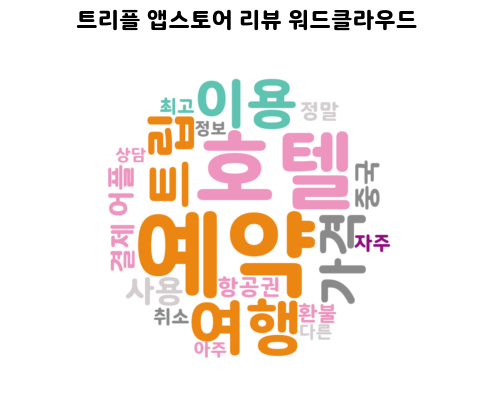

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image

# 마스크 이미지 가져오기
mask_img = np.array(Image.open("circle.png"))

# 특정 색상 정의
highlight_color = (236, 134, 18)  # rgb(236, 134, 18)
other_colors = [
    (144, 13, 130),  # rgb(144, 13, 130)
    (139, 138, 139), # rgb(139, 138, 139)
    (212, 205, 208),  # rgb(212, 205, 208)
    (94, 195, 177),
    (237, 148, 191)
]

# 강조할 단어 리스트
highlight_words = ['여행', '예약', '트립']

# 색상 함수 정의
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    if word in highlight_words:
        return f'rgb({highlight_color[0]}, {highlight_color[1]}, {highlight_color[2]})'
    else:
        # 다른 색상 중 하나를 랜덤하게 선택
        other_color = other_colors[np.random.randint(0, len(other_colors))]
        return f'rgb({other_color[0]}, {other_color[1]}, {other_color[2]})'

# 워드클라우드 생성
wordcloud = WordCloud(
    font_path="C:\Windows\Fonts\TmoneyRoundWindExtraBold.ttf",  # 폰트 경로
    mask=mask_img,
    background_color="white",
    color_func=color_func  # 사용자 정의 색상 함수
).generate_from_frequencies(p_dict)

# 워드클라우드 시각화
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("트리플 앱스토어 리뷰 워드클라우드", fontsize=16)
plt.axis("off")  # 축 숨김
plt.show()

In [91]:
import pandas as pd
import numpy as np

df = pd.read_csv('여행지별_국내여행_횟수_20241221214647.csv')
df

,통계분류(1),통계분류(2),2018,2018.1,2018.2,2018.3,2018.4,2018.5,2018.6,2018.7,...,2023.7,2023.8,2023.9,2023.10,2023.11,2023.12,2023.13,2023.14,2023.15,2023.16
0,통계분류(1),통계분류(2),서울,부산,대구,인천,광주,대전,울산,세종,...,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
1,전체,소계,14811,20419,6613,11122,4396,8944,3891,1526,...,1750,53850,39527,12617,24180,18396,27103,27143,29528,12515
2,성별,남자,7924,10454,3677,5536,2421,4840,1907,962,...,959,24486,19390,6457,12004,9246,13122,13487,14892,5176
3,성별,여자,6888,9965,2936,5586,1976,4103,1984,565,...,791,29364,20137,6159,12176,9151,13981,13657,14636,7338
4,연령,15~19세,1602,1286,410,224,192,440,195,59,...,73,1699,1198,210,580,630,914,805,489,385
5,연령,20대,3344,4267,1187,2378,568,1121,695,141,...,318,8532,6675,1354,3113,2685,3308,3317,3865,1882
6,연령,30대,3147,4239,1397,1513,739,1981,733,366,...,366,10138,7375,2059,4171,2761,4357,4810,4811,2409
7,연령,40대,2867,4387,1209,2080,957,2209,989,406,...,323,11203,8249,2591,5380,3997,5706,5845,6293,2313
8,연령,50대,1818,3631,1404,2490,1056,1514,580,244,...,343,10350,7714,3178,5036,3828,5850,5824,6856,2655
9,연령,60대,1282,1590,721,1383,405,1074,352,224,...,198,7564,5602,2283,3809,2927,4350,4470,5025,2174


In [93]:
# 데이터 로드
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 데이터 로드 및 확인
file_path = '여행지별_국내여행_횟수_20241221214647.csv'
data = pd.read_csv(file_path, header=None)  # 헤더를 사용하지 않고 로드

# 두 번째 행을 열 이름으로 활용하여 열 이름 정리
data.columns = ['통계분류(1)', '통계분류(2)'] + [f"{year}_{region}" for year, region in zip(data.iloc[0, 2:], data.iloc[1, 2:])]

# 첫 두 행 제거 (헤더로 이동되었으므로 불필요)
data = data.iloc[2:].reset_index(drop=True)

# '통계분류(1)'에서 "전체"만 필터링 및 연관 데이터 필터링
filtered_data = data[data['통계분류(1)'] == '전체']

# 연도 및 지역 관련 데이터 필터링
columns_of_interest = ['통계분류(2)'] + [col for col in filtered_data.columns if '_' in col]
filtered_data = filtered_data[columns_of_interest]

# 열 이름 정리
filtered_data.columns = ['지역'] + [col for col in columns_of_interest[1:]]

# 서울, 경기, 인천 합산 후 "수도권" 데이터 생성
for year in range(2018, 2024):  # 2018년부터 2023년까지
    seoul_column = f"{year}_서울"
    gyeonggi_column = f"{year}_경기"
    incheon_column = f"{year}_인천"
    new_column = f"{year}_수도권"
    filtered_data[new_column] = filtered_data[seoul_column].astype(int) + filtered_data[gyeonggi_column].astype(int) + filtered_data[incheon_column].astype(int)

# 서울, 경기, 인천 개별 데이터 삭제
columns_to_keep = ['지역'] + [
    col for col in filtered_data.columns 
    if not any(area in col for area in ['서울', '경기', '인천']) or '수도권' in col
]
simplified_data = filtered_data[columns_to_keep]
simplified_data = simplified_data.iloc[:, 2:]
simplified_data


,2018_부산,2018_대구,2018_광주,2018_대전,2018_울산,2018_세종,2018_강원,2018_충북,2018_충남,2018_전북,...,2023_전남,2023_경북,2023_경남,2023_제주,2018_수도권,2019_수도권,2020_수도권,2021_수도권,2022_수도권,2023_수도권
0,20419,6613,4396,8944,3891,1526,43659,12044,25582,18633,...,27103,27143,29528,12515,64212,91532,67736,75801,80863,79129


In [100]:
import matplotlib.pyplot as plt
import os

# 그래프 저장 디렉토리 설정
output_dir = "graphs"
os.makedirs(output_dir, exist_ok=True)  # 디렉토리가 없으면 생성

# 데이터 변환 및 그래프 준비
simplified_data_transposed = simplified_data.transpose()
simplified_data_transposed.columns = simplified_data_transposed.iloc[0]  # 첫 번째 행을 헤더로 설정
simplified_data_transposed = simplified_data_transposed[1:]  # 첫 번째 행 제거
simplified_data_transposed.index.name = 'Year_Region'  # 인덱스 이름 설정
simplified_data_transposed.reset_index(inplace=True)

# Year와 Region 추출
simplified_data_transposed['Year'] = simplified_data_transposed['Year_Region'].apply(lambda x: x.split('_')[0] if '_' in x else None)
simplified_data_transposed['Region'] = simplified_data_transposed['Year_Region'].apply(lambda x: x.split('_')[1] if '_' in x else None)

# '_`가 포함되지 않은 행 제거
simplified_data_transposed = simplified_data_transposed.dropna(subset=['Year', 'Region'])

# Numeric 데이터 변환
numeric_columns = simplified_data_transposed.columns[1:-2]  # Year_Region, Year, Region 제외
simplified_data_transposed[numeric_columns] = simplified_data_transposed[numeric_columns].apply(pd.to_numeric, errors='coerce')

# 지정된 색상 리스트 (연한 회색 제외)
colors = ['#900d82', '#ec8612', '#8b8a8b', '#d4cdd0']

# 연도별 그래프 생성 및 저장
unique_years = simplified_data_transposed['Year'].unique()

for year in unique_years:
    yearly_data = simplified_data_transposed[simplified_data_transposed['Year'] == year]
    yearly_data['Total'] = yearly_data.iloc[:, 1:-2].sum(axis=1)  # 지역별 데이터 합산
    yearly_data = yearly_data.sort_values(by='Total', ascending=False)  # 내림차순 정렬
    
    # 그래프 생성
    plt.figure(figsize=(12, 6), facecolor='#f6f6f8')  # 배경색 설정
    plt.bar(
        yearly_data['Region'], 
        yearly_data['Total'], 
        color=[colors[i % len(colors)] for i in range(len(yearly_data))]  # 지정된 색상 반복
    )
    plt.rcParams["font.family"] = font_name
    plt.title(f'{year}년 지역별 여행객 통계 (내림차순 정렬)', fontsize=14, backgroundcolor='#f6f6f8')
    plt.xlabel('지역', fontsize=12)
    plt.ylabel('여행객 수', fontsize=12)
    plt.xticks(rotation=0)  # 지역명 회전하지 않음
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    
    # 그래프 파일로 저장
    output_path = os.path.join(output_dir, f"travel_stats_{year}.png")
    plt.savefig(output_path, dpi=300, facecolor='#f6f6f8')  # 배경 포함 저장
    plt.close()

print(f"그래프가 '{output_dir}' 디렉토리에 저장되었습니다.")

C:\Users\samsung\AppData\Local\Temp\ipykernel_22024\1765188888.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearly_data['Total'] = yearly_data.iloc[:, 1:-2].sum(axis=1)  # 지역별 데이터 합산
C:\Users\samsung\AppData\Local\Temp\ipykernel_22024\1765188888.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearly_data['Total'] = yearly_data.iloc[:, 1:-2].sum(axis=1)  # 지역별 데이터 합산
C:\Users\samsung\AppData\Local\Temp\ipykernel_22024\1765188888.py:34: SettingWithCopyWarning: 
A value is trying to be set on a co

그래프가 'graphs' 디렉토리에 저장되었습니다.


C:\Users\samsung\AppData\Local\Temp\ipykernel_4340\3734911850.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Total'] = filtered_data.iloc[:, 1:-2].sum(axis=1)


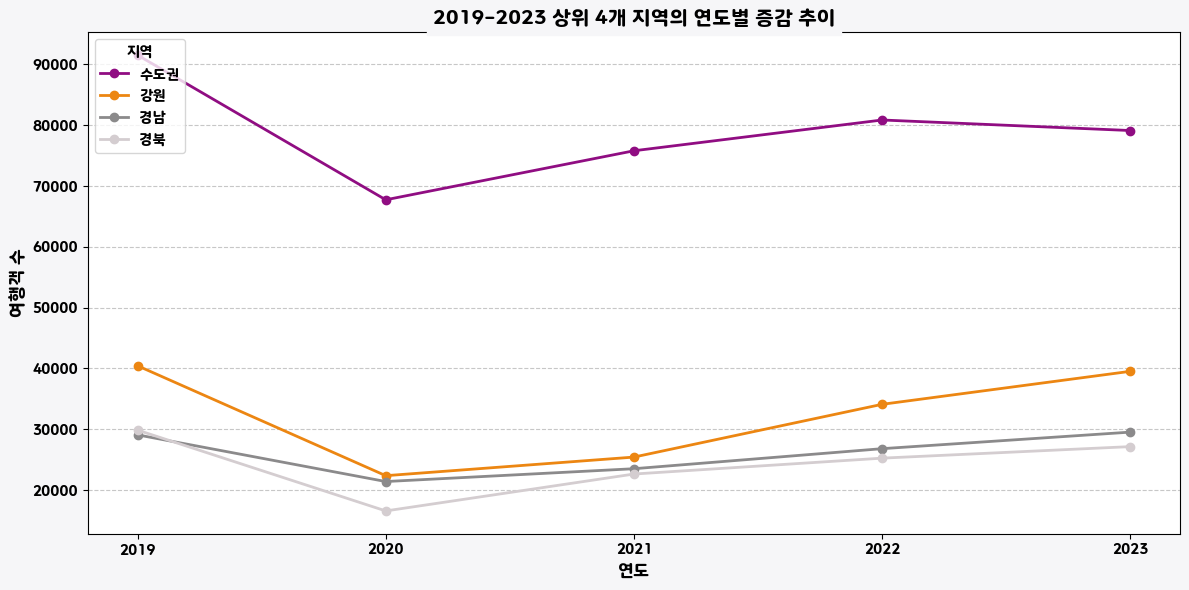

In [68]:
import matplotlib.pyplot as plt
import os

# 그래프 저장 디렉토리 설정
output_dir = "graphs"
os.makedirs(output_dir, exist_ok=True)  # 디렉토리가 없으면 생성

# 데이터 변환 및 준비
simplified_data_transposed = simplified_data.transpose()
simplified_data_transposed.columns = simplified_data_transposed.iloc[0]  # 첫 번째 행을 헤더로 설정
simplified_data_transposed = simplified_data_transposed[1:]  # 첫 번째 행 제거
simplified_data_transposed.index.name = 'Year_Region'  # 인덱스 이름 설정
simplified_data_transposed.reset_index(inplace=True)

# Year와 Region 추출
simplified_data_transposed['Year'] = simplified_data_transposed['Year_Region'].apply(lambda x: x.split('_')[0] if '_' in x else None)
simplified_data_transposed['Region'] = simplified_data_transposed['Year_Region'].apply(lambda x: x.split('_')[1] if '_' in x else None)

# '_`가 포함되지 않은 행 제거
simplified_data_transposed = simplified_data_transposed.dropna(subset=['Year', 'Region'])

# Numeric 데이터 변환
numeric_columns = simplified_data_transposed.columns[1:-2]  # Year_Region, Year, Region 제외
simplified_data_transposed[numeric_columns] = simplified_data_transposed[numeric_columns].apply(pd.to_numeric, errors='coerce')

# 2019년부터 2023년까지 데이터 필터링
selected_years = ['2019', '2020', '2021', '2022', '2023']
filtered_data = simplified_data_transposed[simplified_data_transposed['Year'].isin(selected_years)]

# 지역별 데이터 합계 계산
filtered_data['Total'] = filtered_data.iloc[:, 1:-2].sum(axis=1)

# 상위 4개 지역 선정
region_totals = filtered_data.groupby('Region')['Total'].sum().sort_values(ascending=False)
top_4_regions = region_totals.head(4).index.tolist()

# 상위 4개 지역의 연도별 데이터 준비
top_regions_data = filtered_data[filtered_data['Region'].isin(top_4_regions)]
top_regions_pivot = top_regions_data.pivot(index='Year', columns='Region', values='Total')

# 지정된 색상 리스트
colors = ['#900d82', '#ec8612', '#8b8a8b', '#d4cdd0']

# 그래프 생성 및 저장
plt.figure(figsize=(12, 6), facecolor='#f6f6f8')  # 배경색 설정
for idx, region in enumerate(top_4_regions):
    plt.plot(top_regions_pivot.index, top_regions_pivot[region], label=region, color=colors[idx], marker='o', linewidth=2)

plt.rcParams["font.family"] = font_name
plt.title('2019-2023 상위 4개 지역의 연도별 증감 추이', fontsize=14, backgroundcolor='#f6f6f8')
plt.xlabel('연도', fontsize=12)
plt.ylabel('여행객 수', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='지역', loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# 그래프 저장
output_path = os.path.join(output_dir, "top_4_regions_trend.png")
plt.savefig(output_path, dpi=300, facecolor=plt.gcf().get_facecolor())  # 배경 포함 저장
plt.show()  # 그래프를 화면에 표시

C:\Users\samsung\AppData\Local\Temp\ipykernel_22024\4075978548.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Total'] = filtered_data.iloc[:, 1:-2].sum(axis=1)


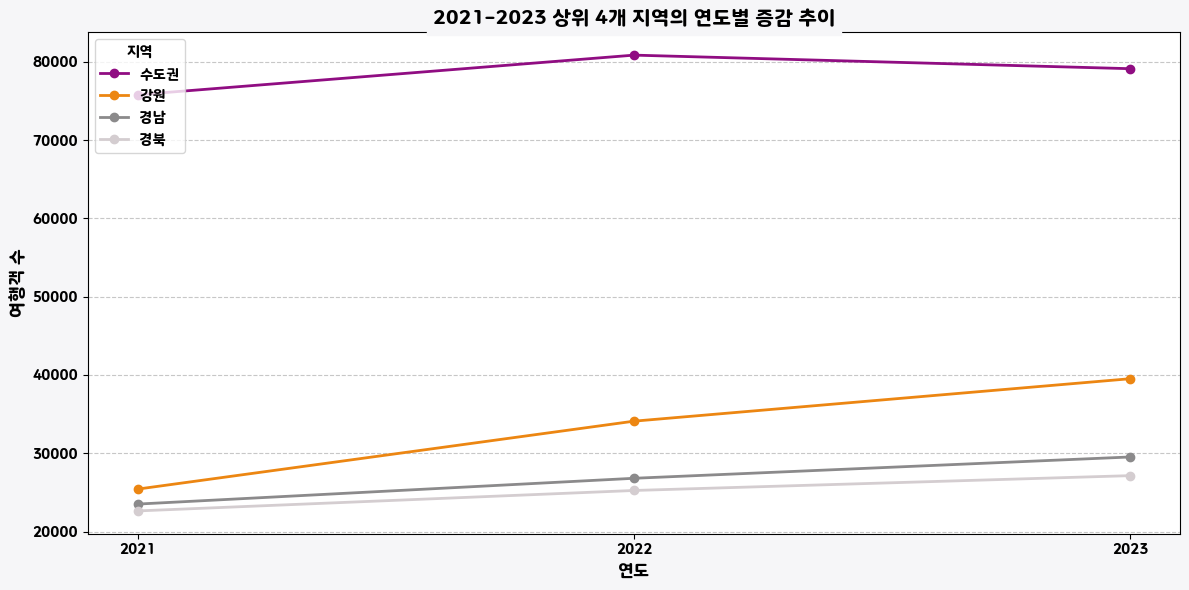

In [107]:
# 2021년부터 2023년 데이터만 필터링
selected_years = ['2021', '2022', '2023']
filtered_data = simplified_data_transposed[simplified_data_transposed['Year'].isin(selected_years)]

# 지역별 데이터 합계 계산
filtered_data['Total'] = filtered_data.iloc[:, 1:-2].sum(axis=1)

# 상위 4개 지역 선정
region_totals = filtered_data.groupby('Region')['Total'].sum().sort_values(ascending=False)
top_4_regions = region_totals.head(4).index.tolist()

# 상위 4개 지역의 연도별 데이터 준비
top_regions_data = filtered_data[filtered_data['Region'].isin(top_4_regions)]
top_regions_pivot = top_regions_data.pivot(index='Year', columns='Region', values='Total')

# 지정된 색상 리스트
colors = ['#900d82', '#ec8612', '#8b8a8b', '#d4cdd0']

# 그래프 생성 및 저장
plt.figure(figsize=(12, 6), facecolor='#f6f6f8')  # 배경색 설정
for idx, region in enumerate(top_4_regions):
    plt.plot(top_regions_pivot.index, top_regions_pivot[region], label=region, color=colors[idx], marker='o', linewidth=2)

plt.title('2021-2023 상위 4개 지역의 연도별 증감 추이', fontsize=14, backgroundcolor='#f6f6f8')
plt.xlabel('연도', fontsize=12)
plt.ylabel('여행객 수', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='지역', loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# 그래프 저장
output_path = os.path.join(output_dir, "top_4_regions_trend_2021_2023.png")
plt.savefig(output_path, dpi=300, facecolor=plt.gcf().get_facecolor())  # 배경 포함 저장
plt.show()  # 그래프를 화면에 표시

# 서울시 지하철 승하차 데이터

In [2]:
import requests

open_api_key = 'your_key'
url = f'http://openapi.seoul.go.kr:8088/{open_api_key}/json/CardSubwayStatsNew/1/1000/20190101'


In [12]:
from datetime import datetime, timedelta

# 시작 날짜와 종료 날짜 설정
start_date = datetime(2019, 1, 1)
end_date = datetime(2024, 12, 19)

# 날짜 리스트를 저장할 리스트 초기화
date_list = []

# 시작 날짜부터 종료 날짜까지 반복
current_date = start_date
while current_date <= end_date:
    date_list.append(current_date.strftime("%Y%m%d"))  # 날짜를 "YYYYMMDD" 형식의 문자열로 저장
    current_date += timedelta(days=1)  # 하루씩 증가

# 생성된 날짜 리스트 출력
print(date_list)

['20190101', '20190102', '20190103', '20190104', '20190105', '20190106', '20190107', '20190108', '20190109', '20190110', '20190111', '20190112', '20190113', '20190114', '20190115', '20190116', '20190117', '20190118', '20190119', '20190120', '20190121', '20190122', '20190123', '20190124', '20190125', '20190126', '20190127', '20190128', '20190129', '20190130', '20190131', '20190201', '20190202', '20190203', '20190204', '20190205', '20190206', '20190207', '20190208', '20190209', '20190210', '20190211', '20190212', '20190213', '20190214', '20190215', '20190216', '20190217', '20190218', '20190219', '20190220', '20190221', '20190222', '20190223', '20190224', '20190225', '20190226', '20190227', '20190228', '20190301', '20190302', '20190303', '20190304', '20190305', '20190306', '20190307', '20190308', '20190309', '20190310', '20190311', '20190312', '20190313', '20190314', '20190315', '20190316', '20190317', '20190318', '20190319', '20190320', '20190321', '20190322', '20190323', '20190324', '20

In [15]:
# 데이터를 저장할 리스트 초기화
data_list = []

for date in date_list:
    # 1. URL 만들기
    url = f'http://openapi.seoul.go.kr:8088/{open_api_key}/json/CardSubwayStatsNew/1/1000/{date}'
    
    # 2. 데이터 요청하기
    response = requests.get(url)
    # {'CODE': 'INFO-200', 'MESSAGE': '해당하는 데이터가 없습니다.'}
    # 조건문
    try :
        data = response.json()['CardSubwayStatsNew']['row']
        print(f'{date} | 데이터 개수 : {len(data)}')
    except :
        print('data를 만드는 과정에서 오류가 났기 때문에 반복문을 종료')
        break
    # 4. 데이터를 한 곳에 담기
    data_list.extend(data)
    

20190101 | 데이터 개수 : 592
20190102 | 데이터 개수 : 592
20190103 | 데이터 개수 : 593
20190104 | 데이터 개수 : 590
20190105 | 데이터 개수 : 589
20190106 | 데이터 개수 : 590
20190107 | 데이터 개수 : 592
20190108 | 데이터 개수 : 591
20190109 | 데이터 개수 : 591
20190110 | 데이터 개수 : 591
20190111 | 데이터 개수 : 592
20190112 | 데이터 개수 : 592
20190113 | 데이터 개수 : 592
20190114 | 데이터 개수 : 592
20190115 | 데이터 개수 : 591
20190116 | 데이터 개수 : 592
20190117 | 데이터 개수 : 591
20190118 | 데이터 개수 : 591
20190119 | 데이터 개수 : 591
20190120 | 데이터 개수 : 592
20190121 | 데이터 개수 : 593
20190122 | 데이터 개수 : 591
20190123 | 데이터 개수 : 590
20190124 | 데이터 개수 : 592
20190125 | 데이터 개수 : 589
20190126 | 데이터 개수 : 591
20190127 | 데이터 개수 : 592
20190128 | 데이터 개수 : 592
20190129 | 데이터 개수 : 593
20190130 | 데이터 개수 : 593
20190131 | 데이터 개수 : 591
20190201 | 데이터 개수 : 590
20190202 | 데이터 개수 : 593
20190203 | 데이터 개수 : 590
20190204 | 데이터 개수 : 588
20190205 | 데이터 개수 : 589
20190206 | 데이터 개수 : 590
20190207 | 데이터 개수 : 591
20190208 | 데이터 개수 : 592
20190209 | 데이터 개수 : 590
20190210 | 데이터 개수 : 589
20190211 | 데이터 개

In [16]:
len(data_list)

1312118

In [17]:
data_list[-1]

{'USE_YMD': '20241219',
 'SBWY_ROUT_LN_NM': '중앙선',
 'SBWY_STNS_NM': '지평',
 'GTON_TNOPE': 49.0,
 'GTOFF_TNOPE': 60.0,
 'REG_YMD': '20241222'}

In [18]:
df = pd.DataFrame(data_list)
df 

,USE_YMD,SBWY_ROUT_LN_NM,SBWY_STNS_NM,GTON_TNOPE,GTOFF_TNOPE,REG_YMD
0,20190101,1호선,서울역,39420.0,31121.0,20190104
1,20190101,1호선,시청,11807.0,10322.0,20190104
2,20190101,1호선,종각,20944.0,16658.0,20190104
3,20190101,1호선,종로3가,17798.0,15762.0,20190104
4,20190101,1호선,종로5가,13578.0,13282.0,20190104
...,...,...,...,...,...,...
1312113,20241219,중앙선,오빈,267.0,285.0,20241222
1312114,20241219,중앙선,양평,3116.0,3126.0,20241222
1312115,20241219,중앙선,원덕,328.0,312.0,20241222
1312116,20241219,중앙선,용문,1693.0,1645.0,20241222


In [33]:
df['GTON_TNOPE'] = df['GTON_TNOPE'].astype('int64')
df['GTOFF_TNOPE'] = df['GTOFF_TNOPE'].astype('int64')

In [53]:
df.columns = ['날짜', '노선', '역', '승차인원', '하차인원', '등록일자']
df['날짜'] = pd.to_datetime(df['날짜'])
df['등록일자'] = pd.to_datetime(df['등록일자'])

df.to_csv('subway.csv', index = False)

In [2]:
import pandas as pd
import datetime as dt

In [3]:
df = pd.read_csv('subway.csv')
df['날짜'] = pd.to_datetime(df['날짜'])
df['등록일자'] = pd.to_datetime(df['등록일자'])
df

,날짜,노선,역,승차인원,하차인원,등록일자
0,2019-01-01,1호선,서울역,39420,31121,2019-01-04
1,2019-01-01,1호선,시청,11807,10322,2019-01-04
2,2019-01-01,1호선,종각,20944,16658,2019-01-04
3,2019-01-01,1호선,종로3가,17798,15762,2019-01-04
4,2019-01-01,1호선,종로5가,13578,13282,2019-01-04
...,...,...,...,...,...,...
1312113,2024-12-19,중앙선,오빈,267,285,2024-12-22
1312114,2024-12-19,중앙선,양평,3116,3126,2024-12-22
1312115,2024-12-19,중앙선,원덕,328,312,2024-12-22
1312116,2024-12-19,중앙선,용문,1693,1645,2024-12-22


In [4]:
df.isna().sum()

날짜      0
노선      0
역       0
승차인원    0
하차인원    0
등록일자    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1312118 entries, 0 to 1312117
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   날짜      1312118 non-null  datetime64[ns]
 1   노선      1312118 non-null  object        
 2   역       1312118 non-null  object        
 3   승차인원    1312118 non-null  int64         
 4   하차인원    1312118 non-null  int64         
 5   등록일자    1312118 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(2)
memory usage: 60.1+ MB


In [6]:
df.dtypes

날짜      datetime64[ns]
노선              object
역               object
승차인원             int64
하차인원             int64
등록일자    datetime64[ns]
dtype: object

In [7]:
df.value_counts('노선').sort_index()

노선
1호선          21800
2호선         109000
3호선          73519
4호선          56680
5호선         118462
6호선          82276
7호선         101740
8호선          38290
9호선          54500
9호선2~3단계     28340
경강선          24243
경부선          85020
경원선          65187
경의선          57726
경인선          43600
경춘선          41420
공항철도 1호선     30520
과천선          17440
분당선          75248
서해선           1614
수인선          36140
신림선          10307
안산선          28340
우이신설선        28340
일산선          22359
장항선          14227
중앙선          45780
Name: count, dtype: int64

In [8]:
print(len(df.loc[df['날짜'].dt.year == 2019]))
print(len(df.loc[df['날짜'].dt.year == 2020]))
print(len(df.loc[df['날짜'].dt.year == 2021]))
print(len(df.loc[df['날짜'].dt.year == 2022]))
print(len(df.loc[df['날짜'].dt.year == 2023]))
print(len(df.loc[df['날짜'].dt.year == 2024]))

215769
217055
219279
219745
222162
218108


In [9]:
print(df.loc[df['날짜'].dt.year == 2019]['역'].nunique())
print(df.loc[df['날짜'].dt.year == 2020]['역'].nunique())
print(df.loc[df['날짜'].dt.year == 2021]['역'].nunique())
print(df.loc[df['날짜'].dt.year == 2022]['역'].nunique())
print(df.loc[df['날짜'].dt.year == 2023]['역'].nunique())
print(df.loc[df['날짜'].dt.year == 2024]['역'].nunique())

509
521
523
530
533
537


In [10]:
station_2019 = df.loc[df['날짜'].dt.year == 2019]['역'].unique()
station_2020 = df.loc[df['날짜'].dt.year == 2020]['역'].unique()
station_2021 = df.loc[df['날짜'].dt.year == 2021]['역'].unique()
station_2022 = df.loc[df['날짜'].dt.year == 2022]['역'].unique()
station_2023 = df.loc[df['날짜'].dt.year == 2023]['역'].unique()
station_2024 = df.loc[df['날짜'].dt.year == 2024]['역'].unique()

print(station_2019)

['서울역' '시청' '종각' '종로3가' '종로5가' '동대문' '신설동' '제기동' '청량리(서울시립대입구)' '동묘앞'
 '을지로입구' '을지로3가' '을지로4가' '동대문역사문화공원' '신당' '상왕십리' '왕십리(성동구청)' '한양대' '뚝섬'
 '성수' '건대입구' '구의(광진구청)' '강변(동서울터미널)' '잠실나루' '잠실(송파구청)' '잠실새내' '종합운동장'
 '삼성(무역센터)' '선릉' '역삼' '강남' '교대(법원.검찰청)' '서초' '방배' '사당' '낙성대' '서울대입구(관악구청)'
 '봉천' '신림' '신대방' '구로디지털단지' '대림(구로구청)' '신도림' '문래' '영등포구청' '당산' '합정' '홍대입구'
 '신촌' '이대' '아현' '충정로(경기대입구)' '용답' '신답' '도림천' '양천구청' '신정네거리' '용두(동대문구청)'
 '지축' '구파발' '연신내' '불광' '녹번' '홍제' '무악재' '독립문' '경복궁(정부서울청사)' '안국' '충무로'
 '동대입구' '약수' '금호' '옥수' '압구정' '신사' '잠원' '고속터미널' '남부터미널(예술의전당)' '양재(서초구청)'
 '매봉' '도곡' '대치' '학여울' '대청' '일원' '수서' '가락시장' '경찰병원' '오금' '당고개' '상계' '노원'
 '창동' '쌍문' '수유(강북구청)' '미아(서울사이버대학)' '미아사거리' '길음' '성신여대입구(돈암)' '한성대입구(삼선교)'
 '혜화' '명동' '회현(남대문시장)' '숙대입구(갈월)' '삼각지' '신용산' '이촌(국립중앙박물관)' '동작(현충원)'
 '총신대입구(이수)' '남태령' '방화' '개화산' '김포공항' '송정' '마곡' '발산' '우장산' '화곡' '까치산'
 '신정(은행정)' '목동' '오목교(목동운동장앞)' '양평' '영등포시장' '신길' '여의도' '여의나루' '마포' '공덕'
 '애오개' '서대문' '광화문(세종문화회관)' '청구' '신금호' '행당' '마장' '답십리' '장한평' '군자(능동)

In [11]:
print(len(set(station_2024) - set(station_2019)))
print(len(set(station_2019) - set(station_2024)))

print(set(station_2024) - set(station_2019))
print(set(station_2019) - set(station_2024))

36
8
{'서울지방병무청', '용마산(용마폭포공원)', '동대문역사문화공원(DDP)', '서울대벤처타운', '한국항공대', '야목', '오목천', '임진강', '당곡', '관악산(서울대)', '평택지제', '서원', '미사', '자양(뚝섬한강공원)', '암사역사공원', '상봉', '마곡나루(서울식물원)', '강일', '하남시청(덕풍·신장)', '보라매병원', '낙성대(강감찬)', '보라매공원', '고색', '원종', '어천', '하남검단산', '사리', '하남풍산', '초성리', '청산', '남위례', '전곡', '성남', '연천', '운천', '탕정'}
{'용마산', '마곡나루', '굴포천', '낙성대', '동대문역사문화공원', '삼산체육관', '부천시청', '지제'}


In [12]:
print(len(set(station_2024) - set(station_2020)))
print(len(set(station_2020) - set(station_2024)))

print(set(station_2024) - set(station_2020))
print(set(station_2020) - set(station_2024))

24
8
{'서울지방병무청', '서울대벤처타운', '한국항공대', '당곡', '관악산(서울대)', '평택지제', '서원', '자양(뚝섬한강공원)', '암사역사공원', '상봉', '강일', '하남시청(덕풍·신장)', '보라매병원', '보라매공원', '하남검단산', '원종', '초성리', '청산', '남위례', '전곡', '성남', '연천', '운천', '탕정'}
{'용마산', '마곡나루', '굴포천', '낙성대', '동대문역사문화공원', '삼산체육관', '부천시청', '지제'}


In [13]:
print(len(set(station_2024) - set(station_2021)))
print(len(set(station_2021) - set(station_2024)))

print(set(station_2024) - set(station_2021))
print(set(station_2021) - set(station_2024))

18
4
{'연천', '관악산(서울대)', '초성리', '청산', '서울지방병무청', '자양(뚝섬한강공원)', '암사역사공원', '상봉', '서울대벤처타운', '전곡', '한국항공대', '성남', '보라매병원', '서원', '당곡', '보라매공원', '원종', '운천'}
{'삼산체육관', '지제', '부천시청', '굴포천'}


In [14]:
print(len(set(station_2024) - set(station_2022)))
print(len(set(station_2022) - set(station_2024)))

print(set(station_2024) - set(station_2022))
print(set(station_2022) - set(station_2024))

10
3
{'연천', '초성리', '청산', '자양(뚝섬한강공원)', '암사역사공원', '상봉', '전곡', '한국항공대', '성남', '원종'}
{'삼산체육관', '부천시청', '굴포천'}


In [15]:
print(len(set(station_2024) - set(station_2023)))
print(len(set(station_2023) - set(station_2024)))

print(set(station_2024) - set(station_2023))
print(set(station_2023) - set(station_2024))

7
3
{'청산', '자양(뚝섬한강공원)', '암사역사공원', '상봉', '한국항공대', '성남', '부평구청'}
{'삼산체육관', '부천시청', '굴포천'}


In [16]:
station_2024

array(['서울역', '시청', '종각', '종로3가', '종로5가', '동대문', '신설동', '제기동',
       '청량리(서울시립대입구)', '동묘앞', '을지로입구', '을지로3가', '을지로4가', '동대문역사문화공원(DDP)',
       '신당', '상왕십리', '왕십리(성동구청)', '한양대', '뚝섬', '성수', '건대입구', '구의(광진구청)',
       '강변(동서울터미널)', '잠실나루', '잠실(송파구청)', '잠실새내', '종합운동장', '삼성(무역센터)',
       '선릉', '역삼', '강남', '교대(법원.검찰청)', '서초', '방배', '사당', '낙성대(강감찬)',
       '서울대입구(관악구청)', '봉천', '신림', '신대방', '구로디지털단지', '대림(구로구청)', '신도림',
       '문래', '영등포구청', '당산', '합정', '홍대입구', '신촌', '이대', '아현', '충정로(경기대입구)',
       '용답', '신답', '도림천', '양천구청', '신정네거리', '용두(동대문구청)', '지축', '구파발',
       '연신내', '불광', '녹번', '홍제', '무악재', '독립문', '경복궁(정부서울청사)', '안국', '동대입구',
       '약수', '금호', '옥수', '압구정', '신사', '잠원', '고속터미널', '남부터미널(예술의전당)',
       '양재(서초구청)', '매봉', '도곡', '대치', '학여울', '대청', '일원', '수서', '가락시장',
       '경찰병원', '오금', '당고개', '상계', '노원', '창동', '쌍문', '수유(강북구청)',
       '미아(서울사이버대학)', '미아사거리', '길음', '성신여대입구(돈암)', '한성대입구(삼선교)', '혜화',
       '충무로', '명동', '회현(남대문시장)', '숙대입구(갈월)', '삼각지', '신용산', '이촌(국립중앙박물관)',
       '동작(현충

In [17]:
# 초성리 -> 청산
# 뚝섬, 뚝섬유원지, 자양
# 화전 -> 한국항공대


In [71]:
target_string = ''
search_24 = list(filter(lambda x : target_string in x, station_2024))
search_23 = list(filter(lambda x : target_string in x, station_2023))
search_22 = list(filter(lambda x : target_string in x, station_2022))
search_21 = list(filter(lambda x : target_string in x, station_2021))
search_20 = list(filter(lambda x : target_string in x, station_2020))
search_19 = list(filter(lambda x : target_string in x, station_2019))

print(search_24)
print(search_23)
print(search_22)
print(search_21)
print(search_20)
print(search_19)

['서울역', '시청', '종각', '종로3가', '종로5가', '동대문', '신설동', '제기동', '청량리(서울시립대입구)', '동묘앞', '을지로입구', '을지로3가', '을지로4가', '동대문역사문화공원(DDP)', '신당', '상왕십리', '왕십리(성동구청)', '한양대', '뚝섬', '성수', '건대입구', '구의(광진구청)', '강변(동서울터미널)', '잠실나루', '잠실(송파구청)', '잠실새내', '종합운동장', '삼성(무역센터)', '선릉', '역삼', '강남', '교대(법원.검찰청)', '서초', '방배', '사당', '낙성대(강감찬)', '서울대입구(관악구청)', '봉천', '신림', '신대방', '구로디지털단지', '대림(구로구청)', '신도림', '문래', '영등포구청', '당산', '합정', '홍대입구', '신촌', '이대', '아현', '충정로(경기대입구)', '용답', '신답', '도림천', '양천구청', '신정네거리', '용두(동대문구청)', '지축', '구파발', '연신내', '불광', '녹번', '홍제', '무악재', '독립문', '경복궁(정부서울청사)', '안국', '동대입구', '약수', '금호', '옥수', '압구정', '신사', '잠원', '고속터미널', '남부터미널(예술의전당)', '양재(서초구청)', '매봉', '도곡', '대치', '학여울', '대청', '일원', '수서', '가락시장', '경찰병원', '오금', '당고개', '상계', '노원', '창동', '쌍문', '수유(강북구청)', '미아(서울사이버대학)', '미아사거리', '길음', '성신여대입구(돈암)', '한성대입구(삼선교)', '혜화', '충무로', '명동', '회현(남대문시장)', '숙대입구(갈월)', '삼각지', '신용산', '이촌(국립중앙박물관)', '동작(현충원)', '총신대입구(이수)', '남태령', '방화', '개화산', '김포공항', '송정', '마곡', '발산', '우장산', '화곡', '까치산', '신정(은행정)', '목동', '오목

In [7]:
# ()와 그 안의 문자열 제거하는 함수
df['역'] = df['역'].str.replace(r'\(.*?\)', '', regex=True)

print(df)

                날짜   노선     역   승차인원   하차인원       등록일자
0       2019-01-01  1호선   서울역  39420  31121 2019-01-04
1       2019-01-01  1호선    시청  11807  10322 2019-01-04
2       2019-01-01  1호선    종각  20944  16658 2019-01-04
3       2019-01-01  1호선  종로3가  17798  15762 2019-01-04
4       2019-01-01  1호선  종로5가  13578  13282 2019-01-04
...            ...  ...   ...    ...    ...        ...
1312113 2024-12-19  중앙선    오빈    267    285 2024-12-22
1312114 2024-12-19  중앙선    양평   3116   3126 2024-12-22
1312115 2024-12-19  중앙선    원덕    328    312 2024-12-22
1312116 2024-12-19  중앙선    용문   1693   1645 2024-12-22
1312117 2024-12-19  중앙선    지평     49     60 2024-12-22

[1312118 rows x 6 columns]


In [8]:
# 역이름 최신화
replace_dict = {
    '초성리': '청산',
    '뚝섬유원지': '자양',
    '화전': '한국항공대'
}

# 대체 작업 수행
df['역'] = df['역'].replace(replace_dict)

print(df)

                날짜   노선     역   승차인원   하차인원       등록일자
0       2019-01-01  1호선   서울역  39420  31121 2019-01-04
1       2019-01-01  1호선    시청  11807  10322 2019-01-04
2       2019-01-01  1호선    종각  20944  16658 2019-01-04
3       2019-01-01  1호선  종로3가  17798  15762 2019-01-04
4       2019-01-01  1호선  종로5가  13578  13282 2019-01-04
...            ...  ...   ...    ...    ...        ...
1312113 2024-12-19  중앙선    오빈    267    285 2024-12-22
1312114 2024-12-19  중앙선    양평   3116   3126 2024-12-22
1312115 2024-12-19  중앙선    원덕    328    312 2024-12-22
1312116 2024-12-19  중앙선    용문   1693   1645 2024-12-22
1312117 2024-12-19  중앙선    지평     49     60 2024-12-22

[1312118 rows x 6 columns]


In [9]:
# 1-9호선 및 9호선2-3단계 조건에 해당하는 행만 남기기
df = df[df['노선'].str.contains(r'^[1-9]호선|9호선2-3단계', regex=True)]

print(df)

                날짜        노선       역   승차인원   하차인원       등록일자
0       2019-01-01       1호선     서울역  39420  31121 2019-01-04
1       2019-01-01       1호선      시청  11807  10322 2019-01-04
2       2019-01-01       1호선      종각  20944  16658 2019-01-04
3       2019-01-01       1호선    종로3가  17798  15762 2019-01-04
4       2019-01-01       1호선    종로5가  13578  13282 2019-01-04
...            ...       ...     ...    ...    ...        ...
1311809 2024-12-19  9호선2~3단계    송파나루   6533   7002 2024-12-22
1311810 2024-12-19  9호선2~3단계    한성백제   3548   3219 2024-12-22
1311811 2024-12-19  9호선2~3단계   올림픽공원   6605   6572 2024-12-22
1311812 2024-12-19  9호선2~3단계    둔촌오륜   2458   2373 2024-12-22
1311813 2024-12-19  9호선2~3단계  중앙보훈병원  14580  12616 2024-12-22

[684607 rows x 6 columns]


In [10]:
df['유동인구'] = df['승차인원'] + df['하차인원']
df

C:\Users\user\AppData\Local\Temp\ipykernel_13428\428351468.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['유동인구'] = df['승차인원'] + df['하차인원']


,날짜,노선,역,승차인원,하차인원,등록일자,유동인구
0,2019-01-01,1호선,서울역,39420,31121,2019-01-04,70541
1,2019-01-01,1호선,시청,11807,10322,2019-01-04,22129
2,2019-01-01,1호선,종각,20944,16658,2019-01-04,37602
3,2019-01-01,1호선,종로3가,17798,15762,2019-01-04,33560
4,2019-01-01,1호선,종로5가,13578,13282,2019-01-04,26860
...,...,...,...,...,...,...,...
1311809,2024-12-19,9호선2~3단계,송파나루,6533,7002,2024-12-22,13535
1311810,2024-12-19,9호선2~3단계,한성백제,3548,3219,2024-12-22,6767
1311811,2024-12-19,9호선2~3단계,올림픽공원,6605,6572,2024-12-22,13177
1311812,2024-12-19,9호선2~3단계,둔촌오륜,2458,2373,2024-12-22,4831


In [11]:
df['연도'] = df['날짜'].dt.year  # 날짜에서 연도 추출하여 새로운 열 생성
yearly_population = df.groupby('연도')['유동인구'].sum().reset_index()

# 결과 출력
print(yearly_population)

     연도        유동인구
0  2019  3782089830
1  2020  2750133617
2  2021  2777435766
3  2022  3061424084
4  2023  3347119595
5  2024  3344379255


C:\Users\user\AppData\Local\Temp\ipykernel_13428\433968503.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['연도'] = df['날짜'].dt.year  # 날짜에서 연도 추출하여 새로운 열 생성


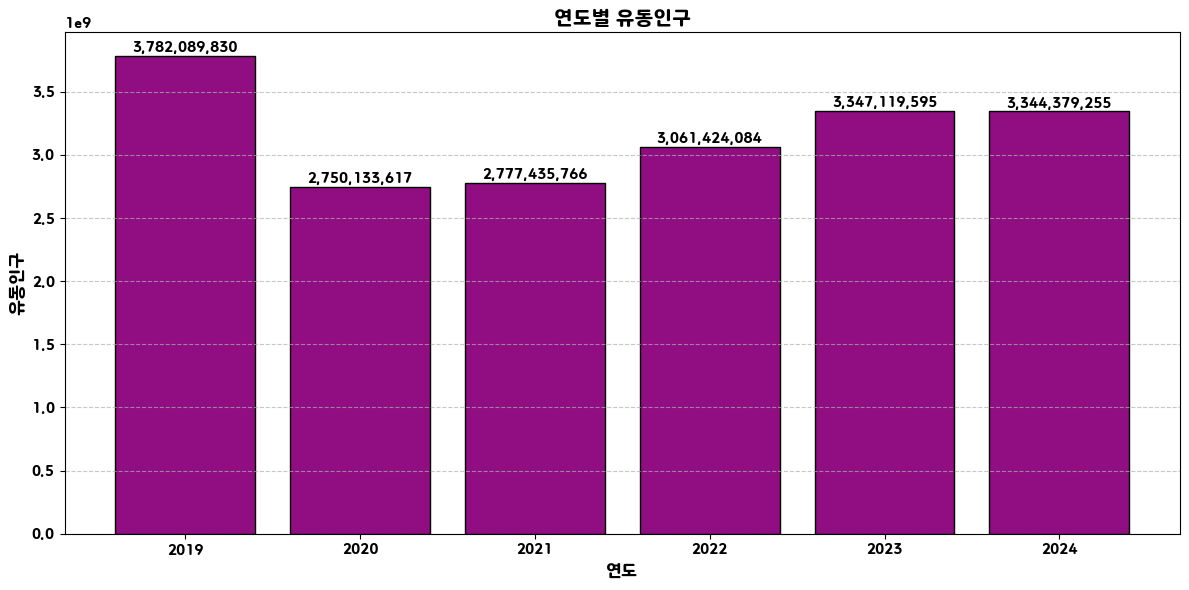

In [7]:
# 데이터 정의
data = {
    "연도": [2019, 2020, 2021, 2022, 2023, 2024],
    "유동인구": [3782089830, 2750133617, 2777435766, 3061424084, 3347119595, 3344379255]
}

colors = ['#900d82', '#900d82', '#900d82', '#900d82', '#900d82', '#900d82']

# 데이터 준비
years = data["연도"]
populations = data["유동인구"]

# 그래프 생성
plt.figure(figsize=(12, 6), facecolor='white')
bars = plt.bar(years, populations, color=colors, edgecolor='black')

# 그래프 꾸미기
plt.title("연도별 유동인구", fontsize=14)
plt.xlabel("연도", fontsize=12)
plt.ylabel("유동인구", fontsize=12)
plt.xticks(years, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 값 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:,}', ha='center', va='bottom', fontsize=10)

# 그래프 출력
plt.tight_layout()
plt.show()

In [12]:
before = df.loc[df['날짜'] < '2024-01-27']
after = df.loc[df['날짜'] >= '2024-01-27']

print(before)
print(after)

                날짜        노선       역   승차인원   하차인원       등록일자   유동인구    연도
0       2019-01-01       1호선     서울역  39420  31121 2019-01-04  70541  2019
1       2019-01-01       1호선      시청  11807  10322 2019-01-04  22129  2019
2       2019-01-01       1호선      종각  20944  16658 2019-01-04  37602  2019
3       2019-01-01       1호선    종로3가  17798  15762 2019-01-04  33560  2019
4       2019-01-01       1호선    종로5가  13578  13282 2019-01-04  26860  2019
...            ...       ...     ...    ...    ...        ...    ...   ...
1109629 2024-01-26  9호선2~3단계    송파나루   6356   6874 2024-01-29  13230  2024
1109630 2024-01-26  9호선2~3단계    한성백제   3437   3031 2024-01-29   6468  2024
1109631 2024-01-26  9호선2~3단계   올림픽공원   8118   8012 2024-01-29  16130  2024
1109632 2024-01-26  9호선2~3단계    둔촌오륜   1093   1075 2024-01-29   2168  2024
1109633 2024-01-26  9호선2~3단계  중앙보훈병원  13355  11441 2024-01-29  24796  2024

[582034 rows x 8 columns]
                날짜        노선       역   승차인원   하차인원       등록일자   유동인구    연

In [13]:
# before 데이터프레임
before['월'] = before['날짜'].dt.to_period('M').astype(str)

# after 데이터프레임    
after['월'] = after['날짜'].dt.to_period('M').astype(str)

# 결과 확인
print(before[['날짜', '월']].head())
print(after[['날짜', '월']].head())


          날짜        월
0 2019-01-01  2019-01
1 2019-01-01  2019-01
2 2019-01-01  2019-01
3 2019-01-01  2019-01
4 2019-01-01  2019-01
                날짜        월
1109936 2024-01-27  2024-01
1109937 2024-01-27  2024-01
1109938 2024-01-27  2024-01
1109939 2024-01-27  2024-01
1109940 2024-01-27  2024-01


C:\Users\user\AppData\Local\Temp\ipykernel_13428\2719225270.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  before['월'] = before['날짜'].dt.to_period('M').astype(str)
C:\Users\user\AppData\Local\Temp\ipykernel_13428\2719225270.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after['월'] = after['날짜'].dt.to_period('M').astype(str)


In [14]:
before.groupby('월')['유동인구'].sum()

월
2019-01    312220604
2019-02    265936900
2019-03    324732115
2019-04    327848883
2019-05    336527120
             ...    
2023-09    271827397
2023-10    285774369
2023-11    290860739
2023-12    288923851
2024-01    237169759
Name: 유동인구, Length: 61, dtype: int64

In [15]:
after.groupby('월')['유동인구'].sum()

월
2024-01     43739885
2024-02    257541353
2024-03    298555329
2024-04    298144812
2024-05    302689747
2024-06    281307722
2024-07    292810672
2024-08    275637365
2024-09    266924767
2024-10    299304826
2024-11    300087625
2024-12    190465393
Name: 유동인구, dtype: int64

In [16]:
before = df.loc[df['날짜'] < '2024-01-27']
after = df.loc[df['날짜'] >= '2024-01-27']

In [17]:
before.groupby('날짜')['유동인구'].sum().mean()

np.float64(8615212.014578834)

In [18]:
after.groupby('날짜')['유동인구'].sum().mean()

np.float64(9473199.68292683)

In [19]:
before = df.loc[df['날짜'] < '2024-07-01']
after = df.loc[df['날짜'] >= '2024-07-01']

In [20]:
before.groupby('날짜')['유동인구'].sum().mean()

np.float64(8683939.989541832)

In [21]:
after.groupby('날짜')['유동인구'].sum().mean()

np.float64(9449015.395348838)

In [22]:
before = df.loc[df['날짜'] < '2024-11-30']
after = df.loc[df['날짜'] >= '2024-11-30']

In [23]:
before.groupby('날짜')['유동인구'].sum().mean()

np.float64(8733259.34074074)

In [24]:
after.groupby('날짜')['유동인구'].sum().mean()

np.float64(9937098.55)

In [25]:
# 역별 유동인구 상위 5개 선택
top5 = df.groupby('역')['유동인구'].sum().sort_values(ascending = False).head(5)
top5

역
잠실       370155985
강남       332185330
고속터미널    330462932
홍대입구     276818061
사당       264787718
Name: 유동인구, dtype: int64

In [ ]:
import folium
from folium.plugins import FloatImage
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt
import base64
import time
import koreanize_matplotlib

# Series를 DataFrame으로 변환
df = top5.reset_index()
df.columns = ['역', '유동인구']

# 유동인구 기준 상위 5개 역 선택
top5 = df.nlargest(5, '유동인구').reset_index(drop=True)  # 중복 인덱스 제거
top5['순위'] = top5.index + 1  # 순위 추가

# 색상 정의 (순위별 색상)
colors = ['red', 'orange', 'yellow', 'green', 'blue']

# Nominatim을 사용해 주소를 위도와 경도로 변환
geolocator = Nominatim(user_agent="geoapi")
latitude = []
longitude = []

for 역 in top5['역']:
    location = geolocator.geocode(f"{역}역, 서울특별시, 대한민국")
    if location:
        latitude.append(location.latitude)
        longitude.append(location.longitude)
    else:
        latitude.append(37.5665)  # 기본값 (서울시청)
        longitude.append(126.9780)
    time.sleep(1)  # 요청 간 대기 시간 추가

# 위도와 경도를 top5 데이터프레임에 추가
top5['위도'] = latitude
top5['경도'] = longitude

# 유동인구 정규화 (0~1 범위)
top5['정규화_유동인구'] = (top5['유동인구'] - top5['유동인구'].min()) / (top5['유동인구'].max() - top5['유동인구'].min())

# 원의 크기를 정규화 값으로 설정 (50~500 픽셀 범위)
top5['반지름'] = top5['정규화_유동인구'] * 450 + 50

# 지도 생성 (중심은 3위 지역)
center_idx = 2  # 0-based index for 3rd place
map_center = [top5.iloc[center_idx]['위도'], top5.iloc[center_idx]['경도']]
m = folium.Map(location=map_center, zoom_start=12)

# 순위별 색상 지정
colors = ['red', 'blue', 'green', 'purple', 'indigo']

# 상위 5개 역을 지도에 원으로 표시
for i, row in top5.iterrows():
    folium.CircleMarker(
        location=[row['위도'], row['경도']],
        radius=row['반지름'] / 10,  # 반지름 값 (정규화된 값으로 설정)
        color=colors[i],  # 순위별 색상
        fill=True,
        fill_color=colors[i],
        fill_opacity=0.7,
        popup=f"{row['역']}<br>유동인구: {row['유동인구']:,}",
        tooltip=f"{i+1}위: {row['역']}"
    ).add_to(m)

legend_html = f'''
<div style="
    position: fixed; 
    bottom: 50px; left: 50px; width: 250px; height: auto; 
    background-color: white; 
    border:2px solid grey; z-index:9999; font-size:14px;
    padding: 10px;
">
    <b>범례</b><br>
    {"".join([f'<i style="background:{colors[i]}; width:10px; height:10px; float:left; margin-right:8px; display:inline-block;"></i> {i+1}위: {row["역"]}<br>' for i, row in top5.iterrows()])}
</div>
'''

m.get_root().html.add_child(folium.Element(legend_html))

m.save("map.html")
print("지도 파일이 저장되었습니다. 'map.html'을 열어보세요.")

In [ ]:
from IPython.display import display

display(m)

# 전체 여행객 이동수단 비율 파악

In [62]:
df_transport = pd.read_csv('관광여행_시_주요_이동_수단__중복응답.csv')
df_transport

,통계분류(1),통계분류(2),2019,2019.1,2019.2,2019.3,2019.4,2019.5,2019.6,2019.7,...,2023.1,2023.2,2023.3,2023.4,2023.5,2023.6,2023.7,2023.8,2023.9,2023.10
0,통계분류(1),통계분류(2),자가용,항공기,고속/시외/시내버스,차량대여/렌트,지하철,전세/관광버스,철도,택시,...,항공기,고속/시외/시내버스,차량대여/렌트,지하철,전세/관광버스,철도,택시,선박/해상교통,자전거,기타
1,전체,소계,78.6,4.5,8,4.4,5.7,5.1,8.2,3.2,...,4.6,4,3.8,3.5,2.9,1.9,1.6,1.1,0.1,0.1
2,성별,남자,80.1,4.1,7.5,4.3,5.5,4.1,7.7,2.6,...,3.8,3.6,3.5,3.4,2.3,1.7,1.5,1.1,0.2,0.1
3,성별,여자,77.1,5,8.5,4.5,6,5.9,8.8,3.7,...,5.4,4.3,4.1,3.5,3.4,2.1,1.7,1,0.1,0.1
4,연령,15~19세,55.4,2.7,26.6,2.9,15.6,4.4,18.8,5.7,...,4.8,18.2,3.3,16.7,2.3,4.4,3.6,0.7,0.3,0.3
5,연령,20대,64,5.3,18.8,5.5,13.6,1.5,17.8,6.8,...,4.5,10.5,4.5,8.1,0.7,4.6,3.6,0.9,0.1,0.2
6,연령,30대,87.9,5.1,4.2,4.4,3.7,1.4,5.4,1.6,...,5,2.3,4.5,2.2,0.5,1.5,1.4,0.7,0.1,0.2
7,연령,40대,88.2,3.8,3.3,3,2.8,3.1,4.3,1.8,...,4,1,3.5,1.4,1.4,1,0.8,1,0.2,0
8,연령,50대,82.8,5,3.3,4.6,2.8,7,5.4,2.5,...,5,1.3,4,1.4,3.2,1.1,1,1.5,0.1,0.1
9,연령,60대,76.5,4.7,5.5,5.2,3.7,11,6.3,2.8,...,5.3,2.7,3.3,2.1,6.4,1.4,1.4,1.4,0.1,0


In [63]:
# 열 이름 변경 함수 정의
def preprocess_columns(columns):
    new_columns = []
    for col in columns:
        if col.startswith("20"):  # 연도로 시작하는 열 이름만 변경
            parts = col.split('.')
            if len(parts) == 1:
                new_columns.append(f"{df_transport.iloc[0][columns.get_loc(col)]}_{col}")  # 이동수단명 + 연도
            else:
                base_year = parts[0]
                mode_name = df_transport.iloc[0][columns.get_loc(col)]
                new_columns.append(f"{mode_name}_{base_year}")
        else:
            new_columns.append(col)
    return new_columns

# 기존 열 이름을 전처리
df_transport.columns = preprocess_columns(df_transport.columns)

# 첫 번째 행 (열 이름 설명) 제거
df_transport = df_transport[1:].reset_index(drop=True)

# 결과 확인
df_transport.head()


C:\Users\user\AppData\Local\Temp\ipykernel_24916\2280621743.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new_columns.append(f"{df_transport.iloc[0][columns.get_loc(col)]}_{col}")  # 이동수단명 + 연도
C:\Users\user\AppData\Local\Temp\ipykernel_24916\2280621743.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mode_name = df_transport.iloc[0][columns.get_loc(col)]


,통계분류(1),통계분류(2),자가용_2019,항공기_2019,고속/시외/시내버스_2019,차량대여/렌트_2019,지하철_2019,전세/관광버스_2019,철도_2019,택시_2019,...,항공기_2023,고속/시외/시내버스_2023,차량대여/렌트_2023,지하철_2023,전세/관광버스_2023,철도_2023,택시_2023,선박/해상교통_2023,자전거_2023,기타_2023
0,전체,소계,78.6,4.5,8,4.4,5.7,5.1,8.2,3.2,...,4.6,4,3.8,3.5,2.9,1.9,1.6,1.1,0.1,0.1
1,성별,남자,80.1,4.1,7.5,4.3,5.5,4.1,7.7,2.6,...,3.8,3.6,3.5,3.4,2.3,1.7,1.5,1.1,0.2,0.1
2,성별,여자,77.1,5,8.5,4.5,6,5.9,8.8,3.7,...,5.4,4.3,4.1,3.5,3.4,2.1,1.7,1,0.1,0.1
3,연령,15~19세,55.4,2.7,26.6,2.9,15.6,4.4,18.8,5.7,...,4.8,18.2,3.3,16.7,2.3,4.4,3.6,0.7,0.3,0.3
4,연령,20대,64,5.3,18.8,5.5,13.6,1.5,17.8,6.8,...,4.5,10.5,4.5,8.1,0.7,4.6,3.6,0.9,0.1,0.2


In [64]:
df = df_transport[0:1]
df

,통계분류(1),통계분류(2),자가용_2019,항공기_2019,고속/시외/시내버스_2019,차량대여/렌트_2019,지하철_2019,전세/관광버스_2019,철도_2019,택시_2019,...,항공기_2023,고속/시외/시내버스_2023,차량대여/렌트_2023,지하철_2023,전세/관광버스_2023,철도_2023,택시_2023,선박/해상교통_2023,자전거_2023,기타_2023
0,전체,소계,78.6,4.5,8,4.4,5.7,5.1,8.2,3.2,...,4.6,4,3.8,3.5,2.9,1.9,1.6,1.1,0.1,0.1


In [65]:
# '고속/시외/시내버스', '지하철', '철도'를 합쳐 연도별로 '대중교통' 열 생성
years = sorted(set(col.split('_')[-1] for col in df.columns if '_' in col))  # 연도 추출

# 대중교통 열 생성
for year in years:
    df[f"대중교통_{year}"] = df[
        [col for col in df.columns if f"_{year}" in col and any(sub in col for sub in ['고속/시외/시내버스', '지하철', '철도'])]
    ].astype(float).sum(axis=1)

# 결과 확인
df[[col for col in df.columns if "대중교통" in col]]
df

C:\Users\user\AppData\Local\Temp\ipykernel_24916\7840213.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"대중교통_{year}"] = df[
C:\Users\user\AppData\Local\Temp\ipykernel_24916\7840213.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"대중교통_{year}"] = df[
C:\Users\user\AppData\Local\Temp\ipykernel_24916\7840213.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

,통계분류(1),통계분류(2),자가용_2019,항공기_2019,고속/시외/시내버스_2019,차량대여/렌트_2019,지하철_2019,전세/관광버스_2019,철도_2019,택시_2019,...,철도_2023,택시_2023,선박/해상교통_2023,자전거_2023,기타_2023,대중교통_2019,대중교통_2020,대중교통_2021,대중교통_2022,대중교통_2023
0,전체,소계,78.6,4.5,8,4.4,5.7,5.1,8.2,3.2,...,1.9,1.6,1.1,0.1,0.1,21.9,17.1,15.2,12.3,9.4


In [66]:
# '기타' 열에 차량대여/렌트, 선박/해상교통, 전세/관광버스 데이터를 연도별로 합산
for year in years:
    df[f"기타_{year}"] = df[
        [col for col in df.columns if f"_{year}" in col and any(sub in col for sub in ['차량대여/렌트', '선박/해상교통', '전세/관광버스'])]
    ].astype(float).sum(axis=1)

# 대중교통 및 기타 데이터에 사용된 기존 열 삭제
columns_to_remove = [
    col for col in df.columns if any(sub in col for sub in ['고속/시외/시내버스', '지하철', '철도', '차량대여/렌트', '선박/해상교통', '전세/관광버스'])
]
df = df.drop(columns=columns_to_remove)

# 결과 확인 (대중교통 및 기타 열)
df[[col for col in df.columns if "대중교통" in col or "기타" in col]]
df

C:\Users\user\AppData\Local\Temp\ipykernel_24916\1746453003.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"기타_{year}"] = df[
C:\Users\user\AppData\Local\Temp\ipykernel_24916\1746453003.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"기타_{year}"] = df[
C:\Users\user\AppData\Local\Temp\ipykernel_24916\1746453003.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

,통계분류(1),통계분류(2),자가용_2019,항공기_2019,택시_2019,자전거_2019,기타_2019,자가용_2020,항공기_2020,택시_2020,...,자가용_2023,항공기_2023,택시_2023,자전거_2023,기타_2023,대중교통_2019,대중교통_2020,대중교통_2021,대중교통_2022,대중교통_2023
0,전체,소계,78.6,4.5,3.2,0.2,12.5,85.9,4.8,2,...,86.8,4.6,1.6,0.1,7.8,21.9,17.1,15.2,12.3,9.4


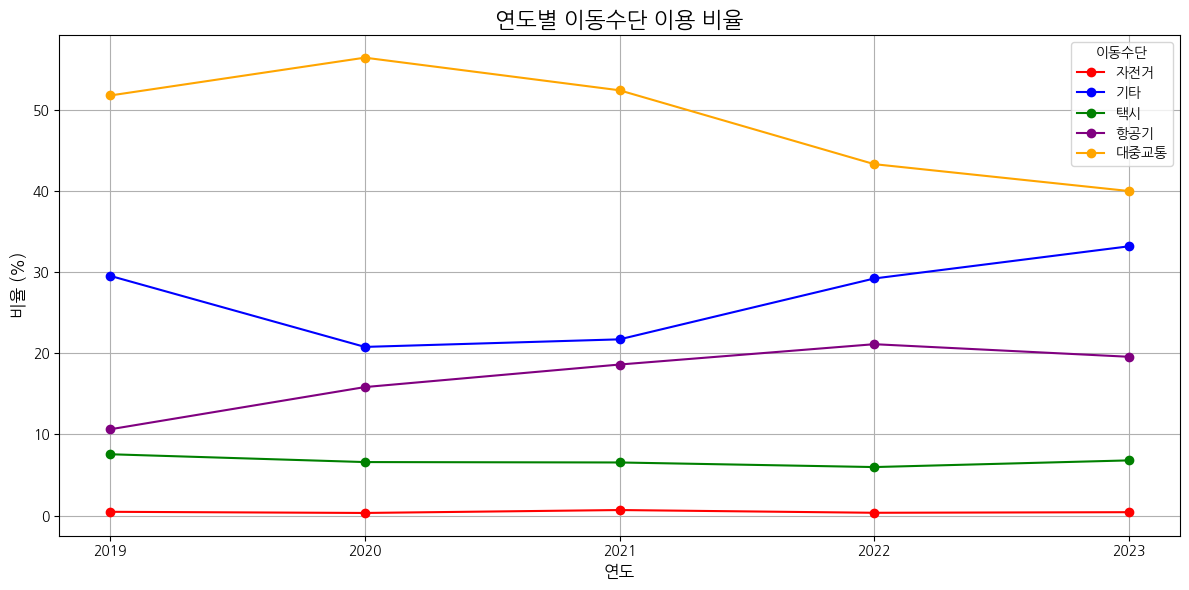

In [69]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 연도별 자가용을 제외한 데이터로 비율 계산
years = sorted(set(col.split('_')[-1] for col in df.columns if '_' in col))
transport_modes = {year: [col for col in df.columns if f"_{year}" in col and "자가용" not in col] for year in years}

mode_percentages = {}
for year, cols in transport_modes.items():
    year_data = pd.to_numeric(df[cols].iloc[0], errors='coerce').fillna(0)  # NaN은 0으로 대체
    total = year_data.sum()
    mode_percentages[year] = {col.split('_')[0]: (year_data[col] / total) * 100 for col in cols}

# 그래프 그리기 (분별되도록 색상 변경)
colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown', 'pink', 'cyan']
color_map = {mode: colors[i % len(colors)] for i, mode in enumerate(set(mode for year_data in mode_percentages.values() for mode in year_data.keys()))}

fig, ax = plt.subplots(figsize=(12, 6))
for mode in set(mode for year_data in mode_percentages.values() for mode in year_data.keys()):
    values = [mode_percentages[year].get(mode, 0) for year in years]
    ax.plot(years, values, label=mode, marker='o', color=color_map[mode])

# 그래프 스타일 설정
ax.set_title('연도별 이동수단 이용 비율', fontsize=16)
ax.set_xlabel('연도', fontsize=12)
ax.set_ylabel('비율 (%)', fontsize=12)
ax.legend(title='이동수단')
ax.grid(True)
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

# 서울시 버스 데이터

In [1]:
import requests

open_api_key = 'your_key'
url = f'http://openapi.seoul.go.kr:8088/{open_api_key}/xml/CardBusStatisticsServiceNew/1/5/20151101/'

In [26]:
from datetime import datetime, timedelta

# 시작 날짜와 종료 날짜 설정
start_date = datetime(2024, 1, 1)
end_date = datetime(2024, 12, 19)

# 날짜 리스트를 저장할 리스트 초기화
date_list = []

# 시작 날짜부터 종료 날짜까지 반복
current_date = start_date
while current_date <= end_date:
    date_list.append(current_date.strftime("%Y%m%d"))  # 날짜를 "YYYYMMDD" 형식의 문자열로 저장
    current_date += timedelta(days=1)  # 하루씩 증가

# 생성된 날짜 리스트 출력
print(date_list)

['20240101', '20240102', '20240103', '20240104', '20240105', '20240106', '20240107', '20240108', '20240109', '20240110', '20240111', '20240112', '20240113', '20240114', '20240115', '20240116', '20240117', '20240118', '20240119', '20240120', '20240121', '20240122', '20240123', '20240124', '20240125', '20240126', '20240127', '20240128', '20240129', '20240130', '20240131', '20240201', '20240202', '20240203', '20240204', '20240205', '20240206', '20240207', '20240208', '20240209', '20240210', '20240211', '20240212', '20240213', '20240214', '20240215', '20240216', '20240217', '20240218', '20240219', '20240220', '20240221', '20240222', '20240223', '20240224', '20240225', '20240226', '20240227', '20240228', '20240229', '20240301', '20240302', '20240303', '20240304', '20240305', '20240306', '20240307', '20240308', '20240309', '20240310', '20240311', '20240312', '20240313', '20240314', '20240315', '20240316', '20240317', '20240318', '20240319', '20240320', '20240321', '20240322', '20240323', '20

In [27]:
import requests
import time

# 데이터를 저장할 리스트 초기화
data_list = []

# 최대 재시도 횟수
max_retries = 5

# 날짜 리스트에 대해 반복
for date in date_list:
    start = 1  # 시작 번호
    end = 1000  # 종료 번호
    has_more_data = True  # 데이터를 더 가져올지 여부

    while has_more_data:
        # URL 생성
        url = f'http://openapi.seoul.go.kr:8088/{open_api_key}/json/CardBusStatisticsServiceNew/{start}/{end}/{date}'

        # 데이터 요청 및 오류 처리
        for retry in range(max_retries):
            try:
                # 요청 전 대기
                time.sleep(1)
                response = requests.get(url, timeout=10)  # 10초 타임아웃 설정
                response.raise_for_status()  # HTTP 상태 코드 확인
                data = response.json().get('CardBusStatisticsServiceNew', {}).get('row', [])

                # 데이터 처리
                if data:
                    print(f'{date} | {start}-{end} | 데이터 개수: {len(data)}')
                    data_list.extend(data)

                    # 데이터가 1000개 미만이면 종료
                    if len(data) < 1000:
                        has_more_data = False
                    else:
                        # 다음 범위로 이동
                        start += 1000
                        end += 1000
                else:
                    print(f'{date} | {start}-{end} | 데이터 없음')
                    has_more_data = False

                # 성공적으로 데이터를 가져왔으므로 루프 탈출
                break

            except requests.exceptions.RequestException as e:
                print(f"{date} | {start}-{end} | 오류 발생: {e}")
                if retry < max_retries - 1:
                    print("재시도 중...")
                    time.sleep(5)  # 재시도 전 대기
                else:
                    print("최대 재시도 횟수 초과. 이 날짜와 범위는 건너뜁니다.")
                    has_more_data = False
                    break

            except KeyError:
                print(f'{date} | {start}-{end} | 데이터 형식 오류 발생')
                has_more_data = False
                break

        # 루프 종료 조건
        if not has_more_data:
            break

20240101 | 1-1000 | 데이터 개수: 1000
20240101 | 1001-2000 | 데이터 개수: 1000
20240101 | 2001-3000 | 데이터 개수: 1000
20240101 | 3001-4000 | 데이터 개수: 1000
20240101 | 4001-5000 | 데이터 개수: 1000
20240101 | 5001-6000 | 데이터 개수: 1000
20240101 | 6001-7000 | 데이터 개수: 1000
20240101 | 7001-8000 | 데이터 개수: 1000
20240101 | 8001-9000 | 데이터 개수: 1000
20240101 | 9001-10000 | 데이터 개수: 1000
20240101 | 10001-11000 | 데이터 개수: 1000
20240101 | 11001-12000 | 데이터 개수: 1000
20240101 | 12001-13000 | 데이터 개수: 1000
20240101 | 13001-14000 | 데이터 개수: 1000
20240101 | 14001-15000 | 데이터 개수: 1000
20240101 | 15001-16000 | 데이터 개수: 1000
20240101 | 16001-17000 | 데이터 개수: 1000
20240101 | 17001-18000 | 데이터 개수: 1000
20240101 | 18001-19000 | 데이터 개수: 1000
20240101 | 19001-20000 | 데이터 개수: 1000
20240101 | 20001-21000 | 데이터 개수: 1000
20240101 | 21001-22000 | 데이터 개수: 1000
20240101 | 22001-23000 | 데이터 개수: 1000
20240101 | 23001-24000 | 데이터 개수: 1000
20240101 | 24001-25000 | 데이터 개수: 1000
20240101 | 25001-26000 | 데이터 개수: 1000
20240101 | 26001-27000 | 데이터 개수: 1

In [219]:
# 20201205 까지 크롤링

In [28]:
len(data_list)

14475523

In [30]:
import pandas as pd

In [31]:
df = pd.DataFrame(data_list)
df 

,USE_YMD,RTE_ID,RTE_NO,RTE_NM,STOPS_ID,STOPS_ARS_NO,SBWY_STNS_NM,GTON_TNOPE,GTOFF_TNOPE,REG_YMD
0,20240101,11110001,100,100번(하계동~용산구청),100000003,01003,명륜3가.성대입구(00030),74.0,86.0,20240104
1,20240101,11110001,100,100번(하계동~용산구청),101000057,02156,을지로입구.로얄호텔(00079),106.0,48.0,20240104
2,20240101,11110001,100,100번(하계동~용산구청),101000060,02159,을지로2가.파인에빈뉴(00080),113.0,28.0,20240104
3,20240101,11110001,100,100번(하계동~용산구청),102000173,03267,서빙고역교차로(00062),14.0,9.0,20240104
4,20240101,11110001,100,100번(하계동~용산구청),101000061,02160,을지로3가(00035),46.0,132.0,20240104
...,...,...,...,...,...,...,...,...,...,...
14475518,20241219,91000044,8762,8762번(디지털미디어시티역~가양역.마포중고등학교),113000180,14271,월드컵파크7단지(00010),3.0,65.0,20241222
14475519,20241219,91000044,8762,8762번(디지털미디어시티역~가양역.마포중고등학교),113000202,14296,디지털미디어시티역2번출구(00001),202.0,1.0,20241222
14475520,20241219,91000044,8762,8762번(디지털미디어시티역~가양역.마포중고등학교),113000204,14307,누리꿈스퀘어.MBC(00005),37.0,71.0,20241222
14475521,20241219,91000044,8762,8762번(디지털미디어시티역~가양역.마포중고등학교),113000450,14359,공항철도디지털미디어시티역(00015),0.0,77.0,20241222


In [32]:
df['GTON_TNOPE'] = df['GTON_TNOPE'].astype('int64')
df['GTOFF_TNOPE'] = df['GTOFF_TNOPE'].astype('int64')

In [33]:
df.columns = ['날짜', '노선ID', '노선번호', '노선명', '정류장ID', '정류장ARS번호', '정류장', '승차인원', '하차인원', '등록일자']
df['날짜'] = pd.to_datetime(df['날짜'])
df['등록일자'] = pd.to_datetime(df['등록일자'])
df['유동인구'] = df['승차인원'] + df['하차인원']

df.to_csv('bus.csv', index = False)

In [34]:
import pandas as pd
import datetime as dt

In [35]:
df = pd.read_csv('bus.csv')
df['날짜'] = pd.to_datetime(df['날짜'])
df['등록일자'] = pd.to_datetime(df['등록일자'])
df

C:\Users\samsung\AppData\Local\Temp\ipykernel_22024\2785947255.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('bus.csv')


,날짜,노선ID,노선번호,노선명,정류장ID,정류장ARS번호,정류장,승차인원,하차인원,등록일자,유동인구
0,2024-01-01,11110001,100,100번(하계동~용산구청),100000003,01003,명륜3가.성대입구(00030),74,86,2024-01-04,160
1,2024-01-01,11110001,100,100번(하계동~용산구청),101000057,02156,을지로입구.로얄호텔(00079),106,48,2024-01-04,154
2,2024-01-01,11110001,100,100번(하계동~용산구청),101000060,02159,을지로2가.파인에빈뉴(00080),113,28,2024-01-04,141
3,2024-01-01,11110001,100,100번(하계동~용산구청),102000173,03267,서빙고역교차로(00062),14,9,2024-01-04,23
4,2024-01-01,11110001,100,100번(하계동~용산구청),101000061,02160,을지로3가(00035),46,132,2024-01-04,178
...,...,...,...,...,...,...,...,...,...,...,...
14475518,2024-12-19,91000044,8762,8762번(디지털미디어시티역~가양역.마포중고등학교),113000180,14271,월드컵파크7단지(00010),3,65,2024-12-22,68
14475519,2024-12-19,91000044,8762,8762번(디지털미디어시티역~가양역.마포중고등학교),113000202,14296,디지털미디어시티역2번출구(00001),202,1,2024-12-22,203
14475520,2024-12-19,91000044,8762,8762번(디지털미디어시티역~가양역.마포중고등학교),113000204,14307,누리꿈스퀘어.MBC(00005),37,71,2024-12-22,108
14475521,2024-12-19,91000044,8762,8762번(디지털미디어시티역~가양역.마포중고등학교),113000450,14359,공항철도디지털미디어시티역(00015),0,77,2024-12-22,77


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14475523 entries, 0 to 14475522
Data columns (total 11 columns):
 #   Column    Dtype         
---  ------    -----         
 0   날짜        datetime64[ns]
 1   노선ID      int64         
 2   노선번호      object        
 3   노선명       object        
 4   정류장ID     object        
 5   정류장ARS번호  object        
 6   정류장       object        
 7   승차인원      int64         
 8   하차인원      int64         
 9   등록일자      datetime64[ns]
 10  유동인구      int64         
dtypes: datetime64[ns](2), int64(4), object(5)
memory usage: 1.2+ GB


In [37]:
df['날짜'].value_counts()

2024-05-14    41374
2024-05-31    41370
2024-06-28    41354
2024-06-21    41354
2024-05-24    41352
              ...  
2024-09-16    39924
2024-01-07    39923
2024-01-21    39895
2024-09-17    39808
2024-02-10    39716
Name: 날짜, Length: 354, dtype: int64

In [38]:
before = df.loc[df['날짜'] < '2024-01-27']
after = df.loc[df['날짜'] >= '2024-01-27']

In [39]:
before.groupby('날짜')['유동인구'].sum().mean()

8298036.115384615

In [40]:
after.groupby('날짜')['유동인구'].sum().mean()

9096174.225609757

In [48]:
before = df.loc[df['날짜'] < '2024-07-01']
after = df.loc[df['날짜'] >= '2024-07-01']

In [42]:
before.groupby('날짜')['유동인구'].sum().mean()

8798961.598901099

In [43]:
after.groupby('날짜')['유동인구'].sum().mean()

9290017.872093024

In [44]:
before = df.loc[df['날짜'] < '2024-11-30']
after = df.loc[df['날짜'] >= '2024-11-30']

In [45]:
before.groupby('날짜')['유동인구'].sum().mean()

9015771.332335329

In [46]:
after.groupby('날짜')['유동인구'].sum().mean()

9401323.0

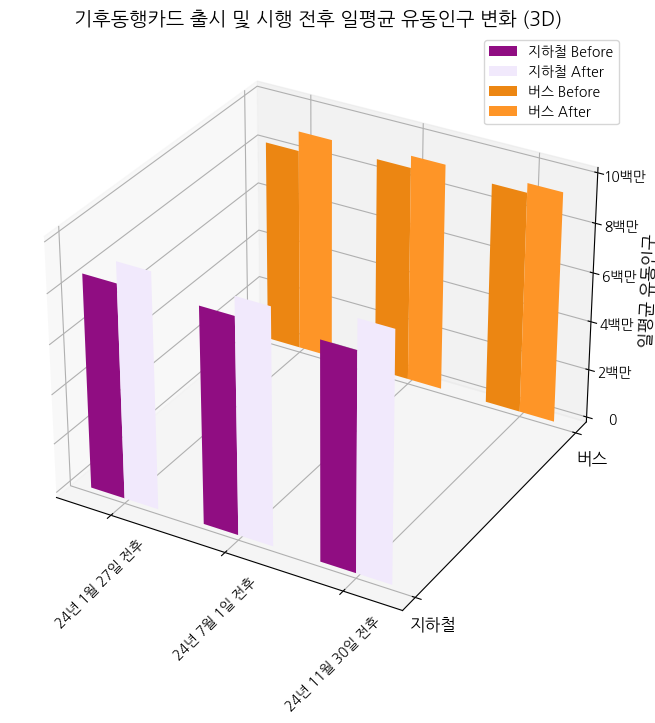

In [90]:
import matplotlib.pyplot as plt
import koreanize_matplotlib
import numpy as np

# 데이터 정리
periods = ['24년 1월 27일 전후', '24년 7월 1일 전후', '24년 11월 30일 전후']
subway_before = [8615212, 8683940, 8733259]
subway_after = [9473200, 9449015, 9937099]
bus_before = [8298036, 8798962, 9015771]
bus_after = [9096174, 9290018, 9401323]

# 수정된 코드: 색상 변경
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# 막대 그래프 데이터
width = 0.3  # 막대 너비
z_subway = 0  # 지하철 막대의 z축 위치
z_bus = 1  # 버스 막대의 z축 위치

# 지하철 Before/After 막대
ax.bar(x - width/2, subway_before, zs=z_subway, zdir='y', width=width, label='지하철 Before', color='#900d82')
ax.bar(x + width/2, subway_after, zs=z_subway, zdir='y', width=width, label='지하철 After', color='#f1e9fc')

# 버스 Before/After 막대
ax.bar(x - width/2, bus_before, zs=z_bus, zdir='y', width=width, label='버스 Before', color='#ec8612')
ax.bar(x + width/2, bus_after, zs=z_bus, zdir='y', width=width, label='버스 After', color='#fe9527')

# 그래프 꾸미기
ax.set_zlabel('일평균 유동인구', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(periods, rotation=45, fontsize=10)
ax.set_yticks([z_subway, z_bus])
ax.set_yticklabels(['지하철', '버스'], fontsize=12)
ax.set_zticks(np.arange(0, 12000000, 2000000))  # z축 단위 설정
ax.set_zticklabels(['0', '2백만', '4백만', '6백만', '8백만', '10백만'], fontsize=10)
ax.set_title('기후동행카드 출시 및 시행 전후 일평균 유동인구 변화 (3D)', fontsize=14)

# 범례 추가
ax.legend(fontsize=10)

# 그래프 표시
plt.show()

In [49]:
from datetime import datetime

# before 데이터프레임
before['월'] = before['날짜'].dt.to_period('M').astype(str)

# after 데이터프레임
after['월'] = after['날짜'].dt.to_period('M').astype(str)

# 결과 확인
print(before[['날짜', '월']].head())
print(after[['날짜', '월']].head())


C:\Users\samsung\AppData\Local\Temp\ipykernel_22024\889147731.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  before['월'] = before['날짜'].dt.to_period('M').astype(str)
C:\Users\samsung\AppData\Local\Temp\ipykernel_22024\889147731.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after['월'] = after['날짜'].dt.to_period('M').astype(str)


          날짜        월
0 2024-01-01  2024-01
1 2024-01-01  2024-01
2 2024-01-01  2024-01
3 2024-01-01  2024-01
4 2024-01-01  2024-01
                날짜        월
7432992 2024-07-01  2024-07
7432993 2024-07-01  2024-07
7432994 2024-07-01  2024-07
7432995 2024-07-01  2024-07
7432996 2024-07-01  2024-07


In [50]:
before.groupby('월')['유동인구'].sum().mean()

266901835.16666666

In [51]:
after.groupby('월')['유동인구'].sum().mean()

266313845.66666666

In [52]:
df.groupby('노선명')['유동인구'].sum().sort_values(ascending = False).head()

노선명
143번(정릉~개포동)               25033182
272번(면목동~남가좌동)             21760665
160번(도봉산~온수동)              21480377
271번(용마문화복지센터~월드컵파크7단지)    20604002
130번(우이동~길동)               19363748
Name: 유동인구, dtype: int64

In [53]:
top5 = df.groupby('정류장ID')['유동인구'].sum().sort_values(ascending = False).head()
top5

정류장ID
120000674    6339111
121000020    6201572
121000019    6031047
113000422    5844588
120000001    5782667
Name: 유동인구, dtype: int64

In [54]:
# Step 1: 정류장 ID와 정류장 이름의 매핑 생성 (중복 제거)
id_to_name = df.drop_duplicates(subset=['정류장ID']).set_index('정류장ID')['정류장']

# Step 2: top5의 인덱스를 정류장 이름으로 변환
top5 = top5.rename(index=id_to_name).reset_index()  # 인덱스를 정류장으로 변환하고 초기화

# Step 3: 열 이름 설정
top5.columns = ['정류장', '유동인구']

# 결과 확인
print(top5)

                  정류장     유동인구
0  구로디지털단지역(중)(00107)  6339111
1        고속터미널(00065)  6201572
2        고속터미널(00043)  6031047
3        홍대입구역(00035)  5844588
4     구로디지털단지역(00068)  5782667


In [56]:
import folium
from folium.plugins import FloatImage
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt
import base64
import time
import koreanize_matplotlib

top5['순위'] = top5.index + 1  # 순위 추가

# 색상 정의 (순위별 색상)
colors = ['red', 'orange', 'yellow', 'green', 'blue']

# Nominatim을 사용해 주소를 위도와 경도로 변환
geolocator = Nominatim(user_agent="geoapi")
latitude = []
longitude = []

for 정류장 in top5['정류장']:
    location = geolocator.geocode(f"{정류장}, 서울특별시, 대한민국")
    if location:
        latitude.append(location.latitude)
        longitude.append(location.longitude)
    else:
        latitude.append(37.5665)  # 기본값 (서울시청)
        longitude.append(126.9780)
    time.sleep(1)  # 요청 간 대기 시간 추가

# 위도와 경도를 top5 데이터프레임에 추가
top5['위도'] = latitude
top5['경도'] = longitude

# 유동인구 정규화 (0~1 범위)
top5['정규화_유동인구'] = (top5['유동인구'] - top5['유동인구'].min()) / (top5['유동인구'].max() - top5['유동인구'].min())

# 원의 크기를 정규화 값으로 설정 (50~500 픽셀 범위)
top5['반지름'] = top5['정규화_유동인구'] * 450 + 50

# 지도 생성 (중심은 3위 지역)
center_idx = 2  # 0-based index for 3rd place
map_center = [top5.iloc[center_idx]['위도'], top5.iloc[center_idx]['경도']]
m = folium.Map(location=map_center, zoom_start=12)

# 순위별 색상 지정
colors = ['red', 'blue', 'green', 'purple', 'indigo']

# 상위 5개 정류장을 지도에 원으로 표시
for i, row in top5.iterrows():
    folium.CircleMarker(
        location=[row['위도'], row['경도']],
        radius=row['반지름'] / 10,  # 반지름 값 (정규화된 값으로 설정)
        color=colors[i],  # 순위별 색상
        fill=True,
        fill_color=colors[i],
        fill_opacity=0.7,
        popup=f"{row['정류장']}<br>유동인구: {row['유동인구']:,}",
        tooltip=f"{i+1}위: {row['정류장']}"
    ).add_to(m)

legend_html = f'''
<div style="
    position: fixed; 
    bottom: 50px; left: 50px; width: 250px; height: auto; 
    background-color: white; 
    border:2px solid grey; z-index:9999; font-size:14px;
    padding: 10px;
">
    <b>범례</b><br>
    {"".join([f'<i style="background:{colors[i]}; width:10px; height:10px; float:left; margin-right:8px; display:inline-block;"></i> {i+1}위: {row["정류장"]}<br>' for i, row in top5.iterrows()])}
</div>
'''

m.get_root().html.add_child(folium.Element(legend_html))

m.save("bus_map.html")
print("지도 파일이 저장되었습니다. 'bus_map.html'을 열어보세요.")

지도 파일이 저장되었습니다. 'bus_map.html'을 열어보세요.


In [83]:
from IPython.display import display

display(m)